In [1]:
!pip install -U efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.6 MB/s eta 0:00:00


In [2]:
# Importing libraries needed for all the operations included in notebook

import os
import time
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import shutil

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization,Flatten, Convolution2D, ZeroPadding2D
from tensorflow.keras.optimizers import Adam,Adamax,RMSprop,SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.utils import to_categorical, plot_model
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import efficientnet.tfkeras as efn

# 1. Loading data, exploration and preprocessing

In [ ]:
# Setting the paths of where the data is located

train_dir = '/kaggle/input/fer-mood-uk-dataset/FER_MOOD_UK_dataset/train'
validation_dir = '/kaggle/input/fer-mood-uk-dataset/FER_MOOD_UK_dataset/validation'
test_dir = '/kaggle/input/fer-mood-uk-dataset/FER_MOOD_UK_dataset/test'

In [ ]:
# Looking what expressions do we have in the train set

print('Train set :')
print(os.listdir(train_dir))

Train set :

['frown', 'eyebrow_raise', 'neutral', 'smile']


In [ ]:
# Looking what expressions do we have in the validation set

print('Validation set :')
print(os.listdir(validation_dir))

Validation set :

['frown', 'eyebrow_raise', 'neutral', 'smile']


In [ ]:
# Looking what expressions do we have in the test set

print('Test set :')
print(os.listdir(test_dir))

Test set :

['frown', 'eyebrow_raise', 'neutral', 'smile']


In [ ]:
# Looking how much images per expression in train set do we have

print('Count of Images in Train set: ')
for expression in os.listdir(train_dir):
    print(str(len(os.listdir(train_dir+os.sep+expression)))+" "+expression +" "+"images")

Count of Images in Train set: 

9500 frown images

4500 eyebrow_raise images

30000 neutral images

15000 smile images


In [ ]:
# Looking how much images per expression in validation set do we have

print('Count of Images in Validation set: ')
for expression in os.listdir(validation_dir):
    print(str(len(os.listdir(validation_dir+os.sep+expression)))+" "+expression +" "+"images")

Count of Images in Validation set: 

1500 frown images

700 eyebrow_raise images

7500 neutral images

3000 smile images


In [ ]:
# Looking how much images per expression in test set do we have
print('Count of Images in Test set: ')
for expression in os.listdir(test_dir):
    print(str(len(os.listdir(test_dir+os.sep+expression)))+" "+expression +" "+"images")

Count of Images in Test set: 

800 frown images

1000 eyebrow_raise images

2900 neutral images

1500 smile images


In [ ]:
# Loading the data using ImageDataGenarator because we work with images

width = 640
height = 480
batch_size = 8
target_size_normal = (width, height)
target_size_224 = (224,224)

datagen_train = ImageDataGenerator(rescale = 1./255,
                  horizontal_flip = True, 
                  rotation_range = 10,
                  width_shift_range = 0.1,
                  height_shift_range = 0.1,
                  shear_range = 0.01,
                  zoom_range = 0.01
                )
train_generator = datagen_train.flow_from_directory(train_dir,
                  target_size = target_size_224,
                  batch_size = batch_size,
                  class_mode ='categorical',shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True, rescale = 1./255)
validation_generator = datagen_validation.flow_from_directory(validation_dir,
                  target_size = target_size_224,
                  batch_size = batch_size,
                  class_mode ='categorical',shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True, rescale = 1./255)
test_generator = datagen_test.flow_from_directory(
        test_dir,
        target_size = target_size_224,
        batch_size = batch_size,
        class_mode ='categorical', shuffle = True)

Found 59000 images belonging to 4 classes.

Found 12700 images belonging to 4 classes.

Found 6200 images belonging to 4 classes.


# 2. Model 1 - One of the top 3 models for FER 2013 dataset

In [ ]:
# Model with 5 Convolutional layers

input_shape = (224, 224, 3)

model1= tf.keras.models.Sequential()

model1.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))

model1.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.33))

model1.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.33))
    
model1.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.33))

model1.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.33))

model1.add(Flatten()) 
model1.add(Dense(256,activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.33))
    
model1.add(Dense(512,activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.33))

model1.add(Dense(4, activation='softmax'))

model1.compile(
    optimizer = Adam(learning_rate=0.0001, decay=1e-6), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [ ]:
# How the model looks

model1.summary()

Model: "sequential"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


conv2d (Conv2D)              (None, 224, 224, 32)      896       

_________________________________________________________________

conv2d_1 (Conv2D)            (None, 224, 224, 64)      18496     

_________________________________________________________________

batch_normalization (BatchNo (None, 224, 224, 64)      256       

_________________________________________________________________

max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         

_________________________________________________________________

dropout (Dropout)            (None, 112, 112, 64)      0         

_________________________________________________________________

conv2d_2 (Conv2D)            (None, 112, 112, 128)     204928    

_________________________________________________________________

batch_normalization_1 (Batch (None, 112,

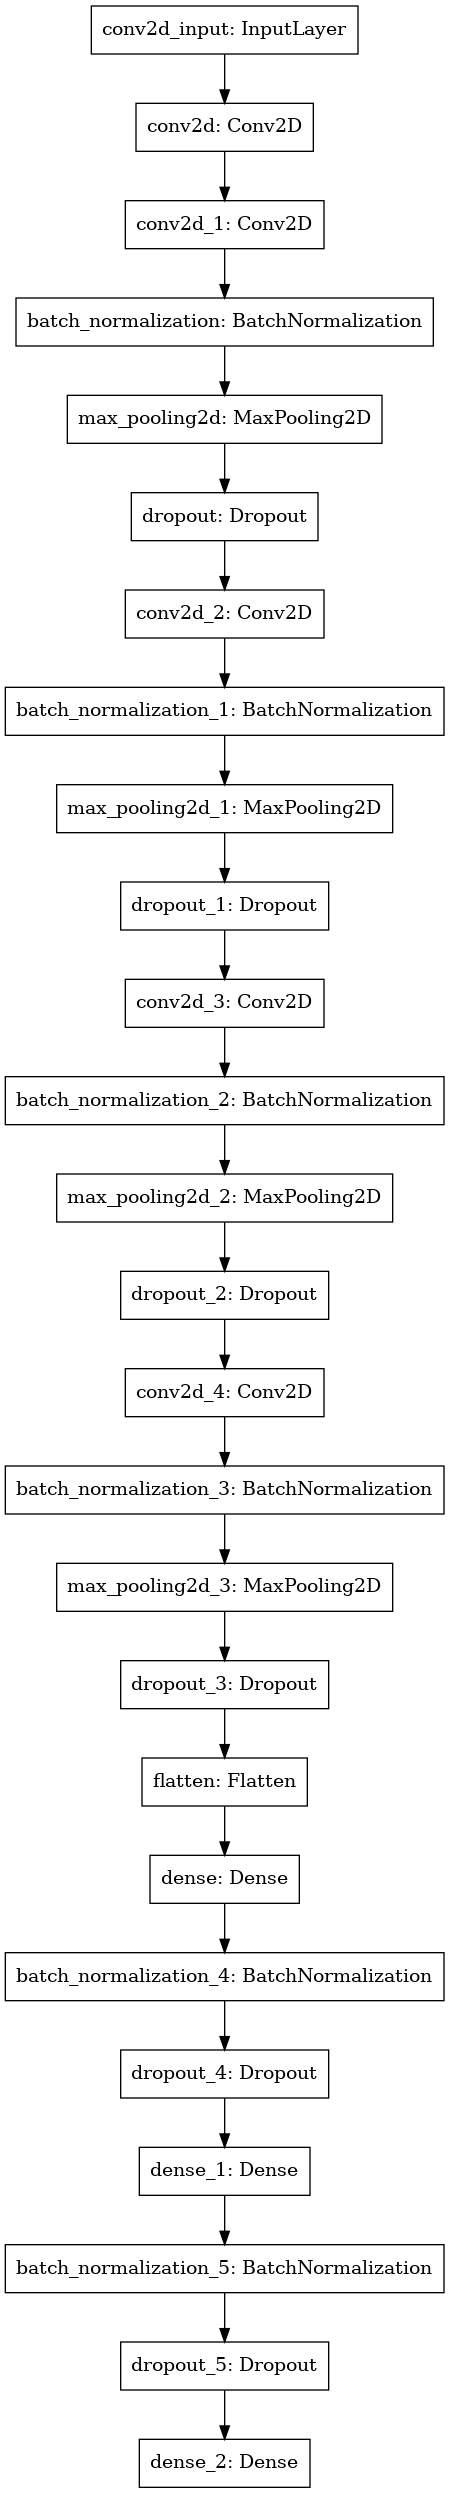

In [ ]:
# More visuals of the model

plot_model(model1, 'model1.png')

In [ ]:
# Callbacks functions for model checkpoint, early stopping, reduce learning rate on plateau

chk_path = 'model1.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training1.log')

callbacks1 = [checkpoint, reduce_lr, csv_logger]

2023-02-06 15:07:26.792323: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.

2023-02-06 15:07:26.793037: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.

2023-02-06 15:07:26.794935: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 2 GPUs

2023-02-06 15:07:27.240630: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.

2023-02-06 15:07:27.240827: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [ ]:
# Training the model

epochs = 5
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history1 = model1.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    epochs = epochs,
    callbacks=callbacks1
                     )

Epoch 1/5

7375/7375 [==============================] - 1397s 189ms/step - loss: 3.1543 - accuracy: 0.4349 - val_loss: 1.5426 - val_accuracy: 0.2896



Epoch 00001: val_loss improved from inf to 1.54265, saving model to model1.h5

Epoch 2/5

7375/7375 [==============================] - 1267s 172ms/step - loss: 1.3923 - accuracy: 0.4782 - val_loss: 1.4443 - val_accuracy: 0.4071



Epoch 00002: val_loss improved from 1.54265 to 1.44430, saving model to model1.h5

Epoch 3/5

7375/7375 [==============================] - 1310s 178ms/step - loss: 1.3178 - accuracy: 0.4971 - val_loss: 1.2847 - val_accuracy: 0.4520



Epoch 00003: val_loss improved from 1.44430 to 1.28473, saving model to model1.h5

Epoch 4/5

7375/7375 [==============================] - 1335s 181ms/step - loss: 1.2874 - accuracy: 0.5040 - val_loss: 1.2175 - val_accuracy: 0.5906



Epoch 00004: val_loss improved from 1.28473 to 1.21747, saving model to model1.h5

Epoch 5/5

7375/7375 [==============================] - 1218s 16

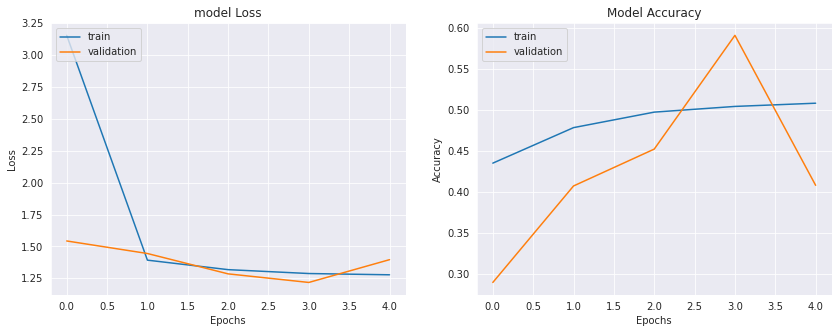

In [ ]:
#Plotting the train and validation accuracy + loss

plt.figure(figsize=(14,5))

plt.subplot(1,2,2)

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

plt.title('Model Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,1)

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title('model Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [ ]:
# Getting the final train, validation, test accuracies and loss

train_loss, train_accu = model1.evaluate(train_generator)
validation_loss, validation_accu = model1.evaluate(validation_generator)
test_loss, test_accu = model1.evaluate(test_generator)
print("Final Train accuracy = {:.2f} , Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(train_accu*100, validation_accu*100, test_accu*100))

7375/7375 [==============================] - 1021s 138ms/step - loss: 1.3319 - accuracy: 0.5030

1588/1588 [==============================] - 96s 60ms/step - loss: 1.3996 - accuracy: 0.4020

775/775 [==============================] - 73s 95ms/step - loss: 1.4521 - accuracy: 0.4679

Final Train accuracy = 50.30 , Validation accuracy = 40.20, Test accuracy = 46.79


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.00      0.00      0.00       700

        frown       0.12      0.31      0.17      1500

      neutral       0.59      0.61      0.60      7500

        smile       0.24      0.08      0.12      3000



     accuracy                           0.42     12700

    macro avg       0.24      0.25      0.22     12700

 weighted avg       0.42      0.42      0.40     12700



Confusion Matrix: 


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

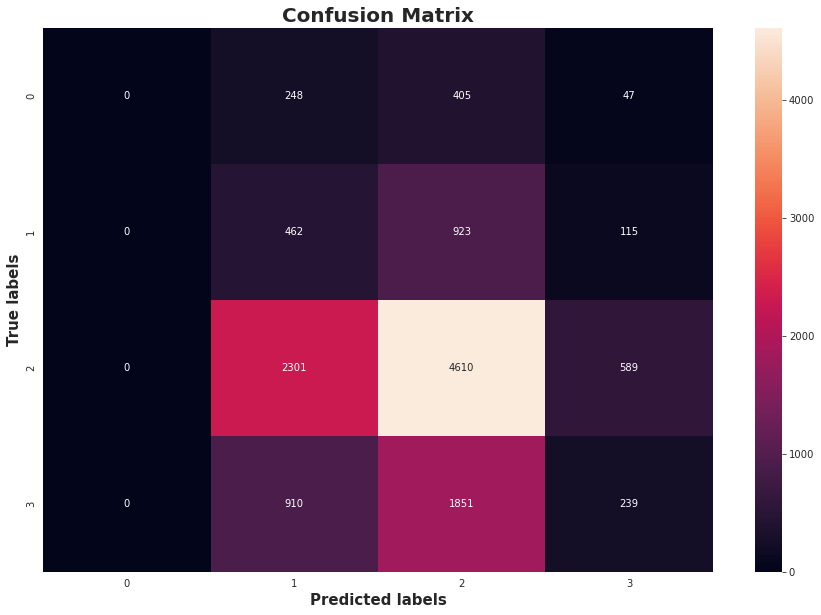

In [ ]:
# Getting classification report and confusion matrix on validation dataset

y_pred = model1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.00      0.00      0.00      1000

        frown       0.00      0.00      0.00       800

      neutral       0.47      1.00      0.64      2900

        smile       0.00      0.00      0.00      1500



     accuracy                           0.47      6200

    macro avg       0.12      0.25      0.16      6200

 weighted avg       0.22      0.47      0.30      6200



Confusion Matrix: 


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

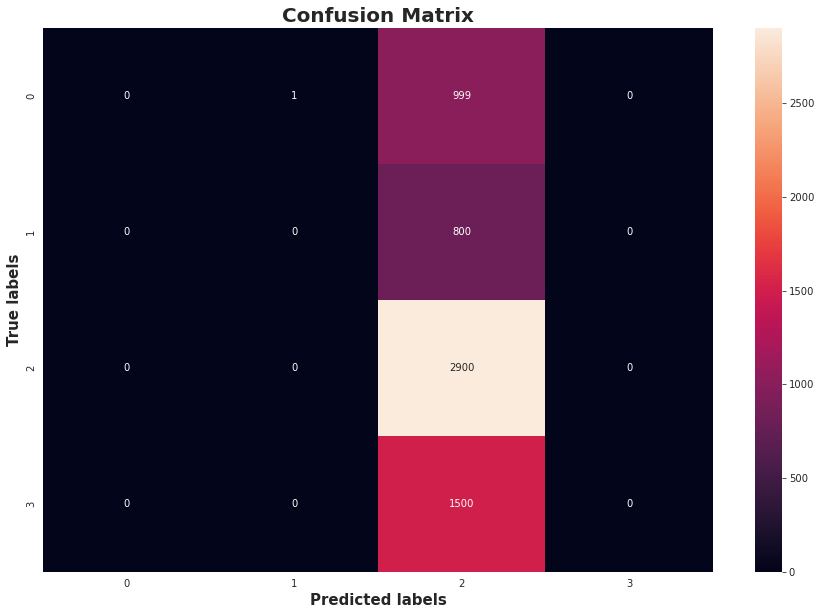

In [ ]:
# Getting classification report and confusion matrix on test dataset

y_pred = model1.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

In [ ]:
model1.save('model1_final.h5')

## Examining results from the "best" model saved based on validation loss

In [ ]:
model1_best = tf.keras.models.load_model('/kaggle/working/model1.h5')

validation_loss_best, validation_accu_best = model1_best.evaluate(validation_generator)
test_loss_best, test_accu_best = model1_best.evaluate(test_generator)
print("Best Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(validation_accu_best*100, test_accu_best*100))

1588/1588 [==============================] - 96s 60ms/step - loss: 1.2166 - accuracy: 0.5904

775/775 [==============================] - 46s 59ms/step - loss: 1.3593 - accuracy: 0.4677

Best Validation accuracy = 59.04, Test accuracy = 46.77


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.00      0.00      0.00       700

        frown       0.00      0.00      0.00      1500

      neutral       0.59      1.00      0.74      7500

        smile       0.44      0.00      0.00      3000



     accuracy                           0.59     12700

    macro avg       0.26      0.25      0.19     12700

 weighted avg       0.45      0.59      0.44     12700



Confusion Matrix: 


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

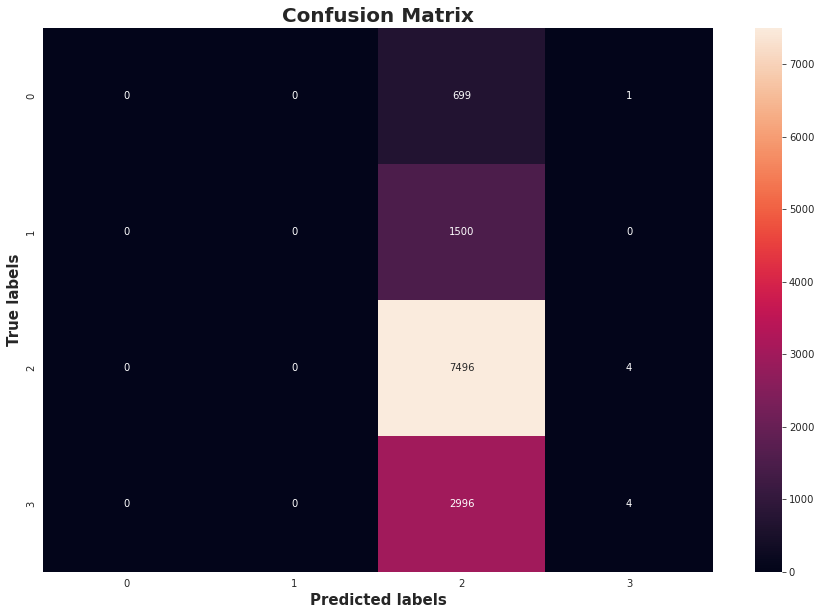

In [ ]:
# Getting classification report and confusion matrix on validation dataset with saved best model

y_pred = model1_best.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.00      0.00      0.00      1000

        frown       0.00      0.00      0.00       800

      neutral       0.47      1.00      0.64      2900

        smile       0.00      0.00      0.00      1500



     accuracy                           0.47      6200

    macro avg       0.12      0.25      0.16      6200

 weighted avg       0.22      0.47      0.30      6200



Confusion Matrix: 


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

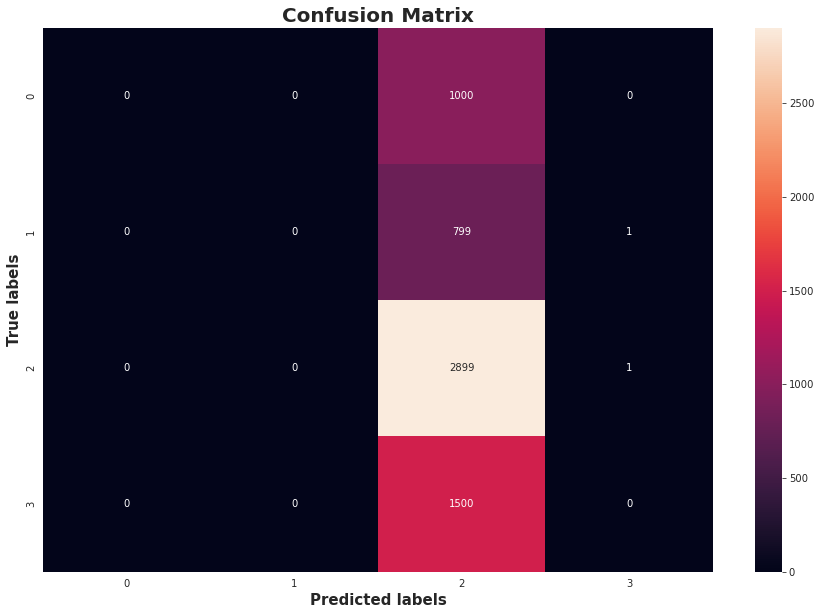

In [ ]:
# Getting classification report and confusion matrix on test dataset with saved best model

y_pred = model1_best.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

# 3. Model 2 - MobileNetV2() - Transfer learning - Fine tuning

In [ ]:
# Getting the base of MobileNetV2 model so we can transfer learn on it

conv_base=tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')



14540800/14536120 [==============================] - 0s 0us/step

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"

__________________________________________________________________________________________________

Layer (type)                    Output Shape         Param #     Connected to                     


input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            

__________________________________________________________________________________________________

Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    

__________________________________________________________________________________________________

bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      

__________________________________________________________________________________________________

Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   

____________________________________________________________________

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block_10_expand':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
# Using the MobileNetV2 model as base and adding some layers so it can work for our dataset

model2 = tf.keras.models.Sequential() 

model2.add(conv_base)

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
           
model2.add(Dense(4, activation='softmax'))

model2.compile(
    optimizer = Adam(learning_rate=0.0001, decay=1e-6), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [ ]:
# How the model looks

model2.summary()

Model: "sequential_1"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


mobilenetv2_1.00_224 (Functi (None, 1000)              3538984   

_________________________________________________________________

flatten_1 (Flatten)          (None, 1000)              0         

_________________________________________________________________

dense_3 (Dense)              (None, 512)               512512    

_________________________________________________________________

dropout_6 (Dropout)          (None, 512)               0         

_________________________________________________________________

dense_4 (Dense)              (None, 4)                 2052      


Total params: 4,053,548

Trainable params: 3,780,076

Non-trainable params: 273,472

_________________________________________________________________


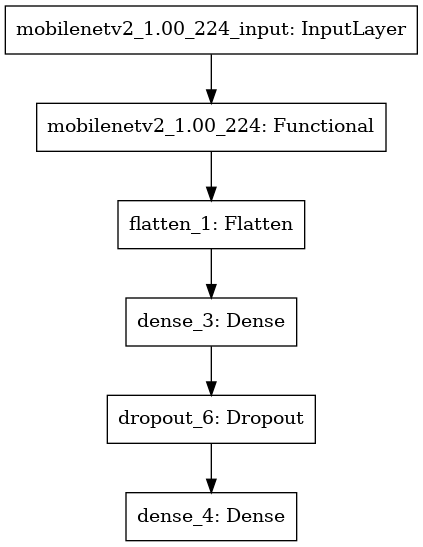

In [ ]:
# More visuals of the model

plot_model(model2, 'model2.png')

In [ ]:
# Callbacks functions for model checkpoint, early stopping, reduce learning rate on plateau

chk_path = 'model2.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training2.log')

callbacks2 = [checkpoint, reduce_lr, csv_logger]

2023-02-06 17:40:03.322361: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.

2023-02-06 17:40:03.322542: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.

2023-02-06 17:40:04.431655: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.

2023-02-06 17:40:04.431828: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [ ]:
# Training the model

epochs = 5
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history2 = model2.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    epochs = epochs,
    callbacks=callbacks2
                     )

Epoch 1/5

7375/7375 [==============================] - 1168s 158ms/step - loss: 0.8211 - accuracy: 0.6816 - val_loss: 1.3798 - val_accuracy: 0.4567



Epoch 00001: val_loss improved from inf to 1.37980, saving model to model2.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

  category=CustomMaskWarning)


Epoch 2/5

7375/7375 [==============================] - 1124s 152ms/step - loss: 0.3393 - accuracy: 0.8806 - val_loss: 1.4343 - val_accuracy: 0.5645



Epoch 00002: val_loss did not improve from 1.37980

Epoch 3/5

7375/7375 [==============================] - 1134s 154ms/step - loss: 0.2428 - accuracy: 0.9139 - val_loss: 1.3718 - val_accuracy: 0.6422



Epoch 00003: val_loss improved from 1.37980 to 1.37184, saving model to model2.h5

Epoch 4/5

7375/7375 [==============================] - 1147s 156ms/step - loss: 0.2029 - accuracy: 0.9266 - val_loss: 1.3635 - val_accuracy: 0.6219



Epoch 00004: val_loss improved from 1.37184 to 1.36349, saving model to model2.h5

Epoch 5/5

7375/7375 [==============================] - 1122s 152ms/step - loss: 0.1756 - accuracy: 0.9373 - val_loss: 1.1891 - val_accuracy: 0.6985



Epoch 00005: val_loss improved from 1.36349 to 1.18908, saving model to model2.h5


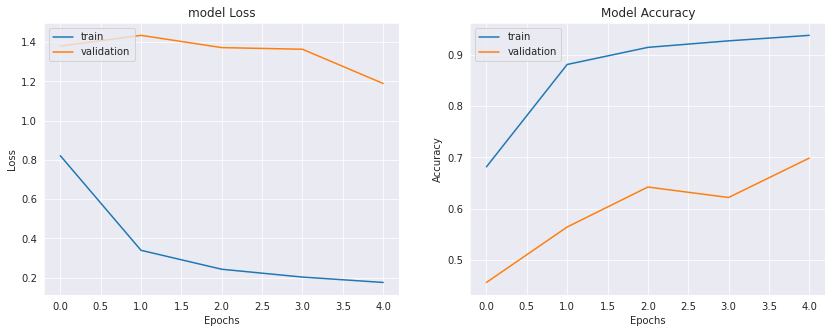

In [ ]:
#Plotting the train and validation accuracy + loss

plt.figure(figsize=(14,5))

plt.subplot(1,2,2)

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,1)

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('model Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [ ]:
# Getting the final train, validation, test accuracies and loss

train_loss, train_accu = model2.evaluate(train_generator)
validation_loss, validation_accu = model2.evaluate(validation_generator)
test_loss, test_accu = model2.evaluate(test_generator)
print("Final Train accuracy = {:.2f} , Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(train_accu*100, validation_accu*100, test_accu*100))

7375/7375 [==============================] - 987s 134ms/step - loss: 0.1495 - accuracy: 0.9466

1588/1588 [==============================] - 99s 62ms/step - loss: 1.1941 - accuracy: 0.6956

775/775 [==============================] - 55s 71ms/step - loss: 1.2855 - accuracy: 0.7195

Final Train accuracy = 94.66 , Validation accuracy = 69.56, Test accuracy = 71.95


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.08      0.04      0.05       700

        frown       0.12      0.02      0.04      1500

      neutral       0.60      0.76      0.67      7500

        smile       0.25      0.21      0.23      3000



     accuracy                           0.50     12700

    macro avg       0.26      0.26      0.25     12700

 weighted avg       0.43      0.50      0.46     12700



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

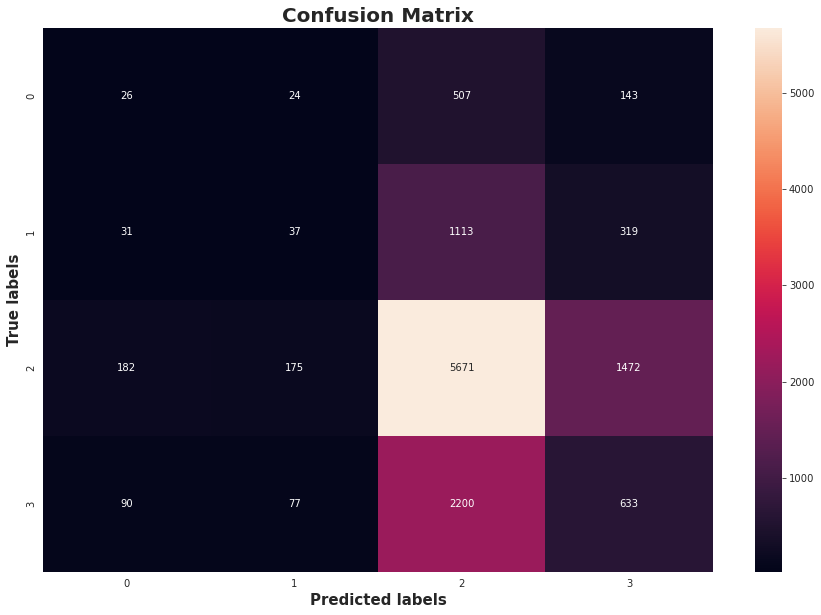

In [ ]:
# Getting classification report and confusion matrix on validation dataset

y_pred = model2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.16      0.07      0.10      1000

        frown       0.08      0.00      0.00       800

      neutral       0.47      0.74      0.58      2900

        smile       0.24      0.19      0.21      1500



     accuracy                           0.40      6200

    macro avg       0.24      0.25      0.22      6200

 weighted avg       0.31      0.40      0.34      6200



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

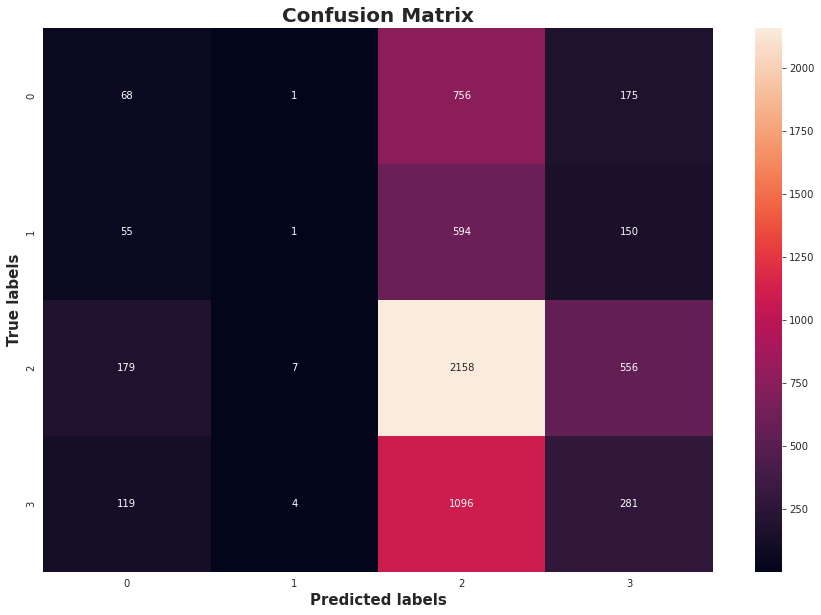

In [ ]:
# Getting classification report and confusion matrix on test dataset

y_pred = model2.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

# 4. Model 3 - VGG16Imagenet() - Transfer learning - Fine tuning

In [ ]:
conv_base2 = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))


58892288/58889256 [==============================] - 0s 0us/step

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base2.summary()

Model: "vgg16"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


input_2 (InputLayer)         [(None, 224, 224, 3)]     0         

_________________________________________________________________

block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      

_________________________________________________________________

block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     

_________________________________________________________________

block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         

_________________________________________________________________

block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     

_________________________________________________________________

block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    

_________________________________________________________________

block2_pool (MaxPooling2D)   (None, 56, 56, 1

In [ ]:
conv_base2.trainable = True
set_trainable = False
for layer in conv_base2.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model3 = tf.keras.models.Sequential() 

model3.add(conv_base2)

model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))
           
model3.add(Dense(4, activation='softmax'))

model3.compile(
    optimizer = Adam(learning_rate=0.0001, decay=1e-6), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [ ]:
# How the model looks

model3.summary()

Model: "sequential_2"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


vgg16 (Functional)           (None, 7, 7, 512)         14714688  

_________________________________________________________________

flatten_2 (Flatten)          (None, 25088)             0         

_________________________________________________________________

dense_5 (Dense)              (None, 512)               12845568  

_________________________________________________________________

dropout_7 (Dropout)          (None, 512)               0         

_________________________________________________________________

dense_6 (Dense)              (None, 4)                 2052      


Total params: 27,562,308

Trainable params: 27,302,148

Non-trainable params: 260,160

_________________________________________________________________


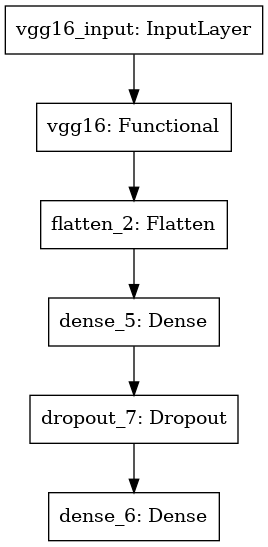

In [ ]:
# More visuals of the model

plot_model(model3, 'model3.png')

In [ ]:
# Callbacks functions for model checkpoint, early stopping, reduce learning rate on plateau

chk_path = 'model3.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training3.log')

callbacks3 = [checkpoint, reduce_lr, csv_logger]

2023-02-06 19:56:07.313095: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.

2023-02-06 19:56:07.313165: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.

2023-02-06 19:56:08.033180: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.

2023-02-06 19:56:08.033346: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [ ]:
# Training the model

epochs = 5
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history3 = model3.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    epochs = epochs,
    callbacks=callbacks3
                     )

Epoch 1/5

7375/7375 [==============================] - 1296s 175ms/step - loss: 1.1361 - accuracy: 0.5214 - val_loss: 1.2217 - val_accuracy: 0.5696



Epoch 00001: val_loss improved from inf to 1.22171, saving model to model3.h5

Epoch 2/5

7375/7375 [==============================] - 1320s 179ms/step - loss: 0.5536 - accuracy: 0.7842 - val_loss: 1.2859 - val_accuracy: 0.6200



Epoch 00002: val_loss did not improve from 1.22171

Epoch 3/5

7375/7375 [==============================] - 1307s 177ms/step - loss: 0.2444 - accuracy: 0.9153 - val_loss: 1.8154 - val_accuracy: 0.6022



Epoch 00003: val_loss did not improve from 1.22171

Epoch 4/5

7375/7375 [==============================] - 1277s 173ms/step - loss: 0.1862 - accuracy: 0.9375 - val_loss: 1.4483 - val_accuracy: 0.6146



Epoch 00004: val_loss did not improve from 1.22171

Epoch 5/5

7375/7375 [==============================] - 1264s 171ms/step - loss: 0.1586 - accuracy: 0.9470 - val_loss: 0.9972 - val_accuracy: 0.6756



Epoch

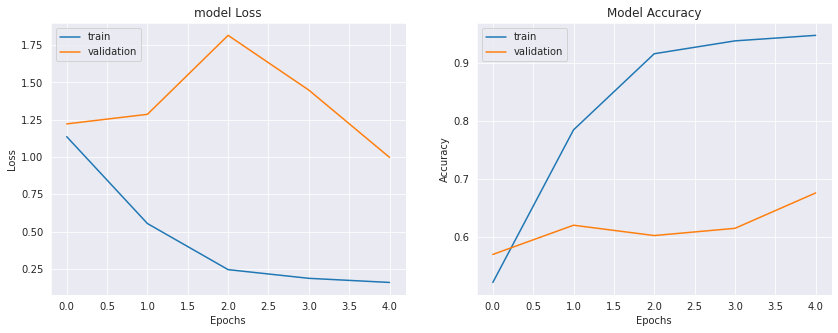

In [ ]:
#Plotting the train and validation accuracy + loss

plt.figure(figsize=(14,5))

plt.subplot(1,2,2)

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])

plt.title('Model Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,1)

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

plt.title('model Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [ ]:
# Getting the final train, validation, test accuracies and loss

train_loss, train_accu = model3.evaluate(train_generator)
validation_loss, validation_accu = model3.evaluate(validation_generator)
test_loss, test_accu = model3.evaluate(test_generator)
print("Final Train accuracy = {:.2f} , Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(train_accu*100, validation_accu*100, test_accu*100))

7375/7375 [==============================] - 1055s 143ms/step - loss: 0.3526 - accuracy: 0.8772

1588/1588 [==============================] - 104s 66ms/step - loss: 1.0027 - accuracy: 0.6769

775/775 [==============================] - 74s 96ms/step - loss: 0.8435 - accuracy: 0.7410

Final Train accuracy = 87.72 , Validation accuracy = 67.69, Test accuracy = 74.10


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.10      0.01      0.01       700

        frown       0.11      0.05      0.07      1500

      neutral       0.59      0.86      0.70      7500

        smile       0.24      0.09      0.13      3000



     accuracy                           0.53     12700

    macro avg       0.26      0.25      0.23     12700

 weighted avg       0.42      0.53      0.45     12700



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

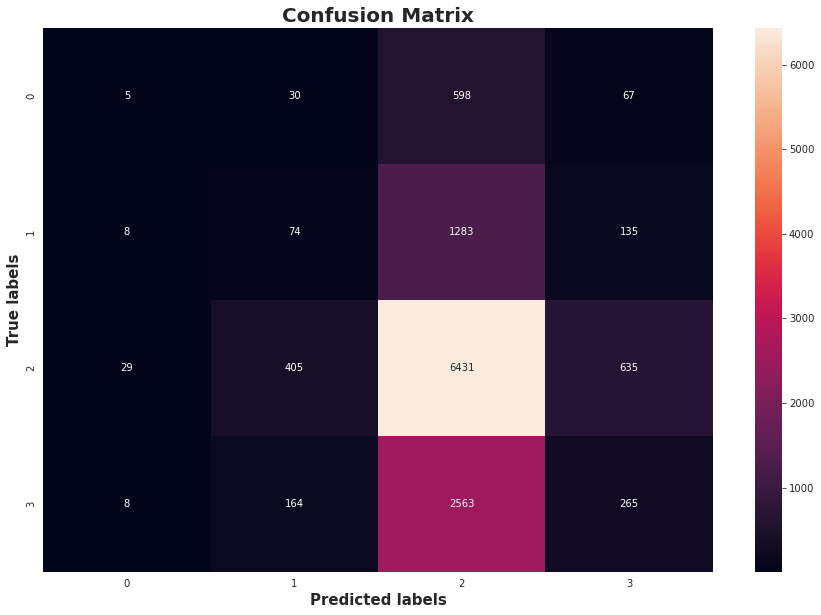

In [ ]:
# Getting classification report and confusion matrix on validation dataset

y_pred = model3.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.18      0.05      0.08      1000

        frown       0.12      0.06      0.07       800

      neutral       0.46      0.70      0.56      2900

        smile       0.22      0.17      0.20      1500



     accuracy                           0.38      6200

    macro avg       0.24      0.24      0.23      6200

 weighted avg       0.31      0.38      0.33      6200



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

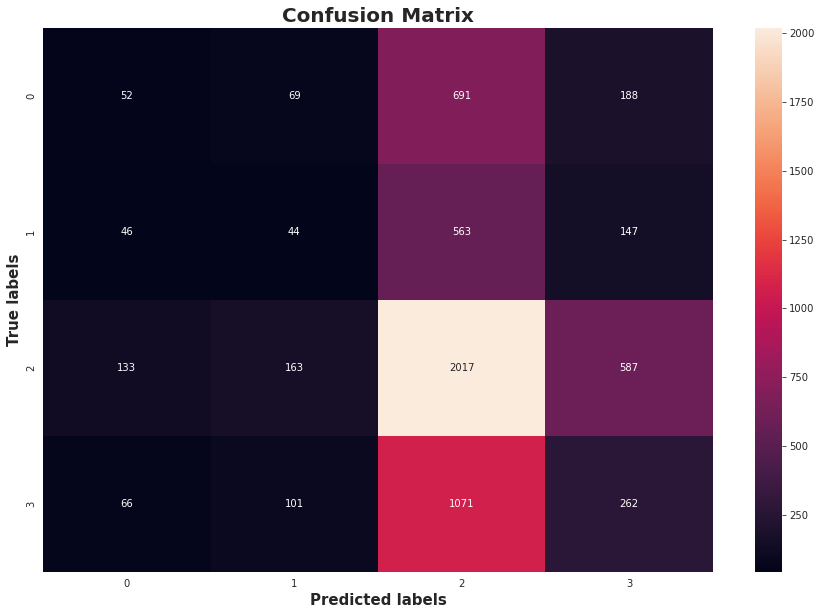

In [ ]:
# Getting classification report and confusion matrix on test dataset

y_pred = model3.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

# 5. Model 4 - InceptionResNetV2() - Transfer learning - Fine tuning

In [ ]:
conv_base3 = tf.keras.applications.InceptionResNetV2()


225214464/225209952 [==============================] - 1s 0us/step

225222656/225209952 [==============================] - 1s 0us/step


In [ ]:
conv_base3.summary()

Model: "inception_resnet_v2"

__________________________________________________________________________________________________

Layer (type)                    Output Shape         Param #     Connected to                     


input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            

__________________________________________________________________________________________________

conv2d_5 (Conv2D)               (None, 149, 149, 32) 864         input_3[0][0]                    

__________________________________________________________________________________________________

batch_normalization_6 (BatchNor (None, 149, 149, 32) 96          conv2d_5[0][0]                   

__________________________________________________________________________________________________

activation (Activation)         (None, 149, 149, 32) 0           batch_normalization_6[0][0]      

_____________________________________________________________________

In [ ]:
conv_base3.trainable = True

set_trainable = False
for layer in conv_base3.layers:
    if layer.name == 'conv2d_53':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model4 = tf.keras.models.Sequential() 

model4.add(conv_base3)

model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.5))
           
model4.add(Dense(4, activation='softmax'))

model4.compile(
    optimizer = Adam(learning_rate=0.0001, decay=1e-6), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [ ]:
model4.summary()

Model: "sequential_3"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


inception_resnet_v2 (Functio (None, 1000)              55873736  

_________________________________________________________________

flatten_3 (Flatten)          (None, 1000)              0         

_________________________________________________________________

dense_7 (Dense)              (None, 512)               512512    

_________________________________________________________________

dropout_8 (Dropout)          (None, 512)               0         

_________________________________________________________________

dense_8 (Dense)              (None, 4)                 2052      


Total params: 56,388,300

Trainable params: 55,115,708

Non-trainable params: 1,272,592

_________________________________________________________________


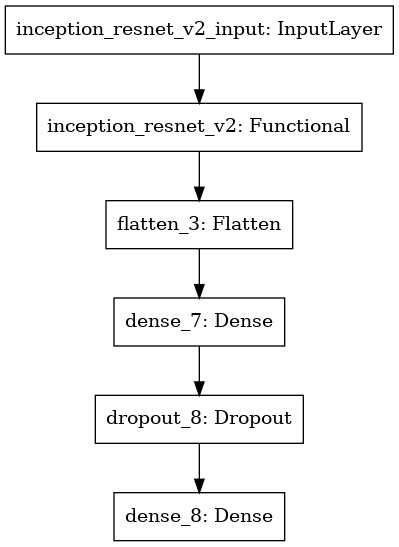

In [ ]:
plot_model(model4, 'model4.png')

In [ ]:
# Callbacks functions for model checkpoint, early stopping, reduce learning rate on plateau

chk_path = 'model4.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training4.log')

callbacks4 = [checkpoint, reduce_lr, csv_logger]

2023-02-06 22:23:10.182732: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.

2023-02-06 22:23:10.182807: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.

2023-02-06 22:23:10.825157: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.

2023-02-06 22:23:10.825320: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [ ]:
# Training the model

epochs = 5
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history4 = model4.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    epochs = epochs,
    callbacks=callbacks4
                     )

Epoch 1/5

7375/7375 [==============================] - 1581s 212ms/step - loss: 0.6670 - accuracy: 0.7526 - val_loss: 1.6423 - val_accuracy: 0.4860



Epoch 00001: val_loss improved from inf to 1.64231, saving model to model4.h5

Epoch 2/5

7375/7375 [==============================] - 1548s 210ms/step - loss: 0.2121 - accuracy: 0.9328 - val_loss: 1.3532 - val_accuracy: 0.5740



Epoch 00002: val_loss improved from 1.64231 to 1.35323, saving model to model4.h5

Epoch 3/5

7375/7375 [==============================] - 1532s 208ms/step - loss: 0.1474 - accuracy: 0.9516 - val_loss: 1.2198 - val_accuracy: 0.6575



Epoch 00003: val_loss improved from 1.35323 to 1.21982, saving model to model4.h5

Epoch 4/5

7375/7375 [==============================] - 1508s 204ms/step - loss: 0.1192 - accuracy: 0.9595 - val_loss: 1.7458 - val_accuracy: 0.4593



Epoch 00004: val_loss did not improve from 1.21982

Epoch 5/5

7375/7375 [==============================] - 1506s 204ms/step - loss: 0.1037 - accur

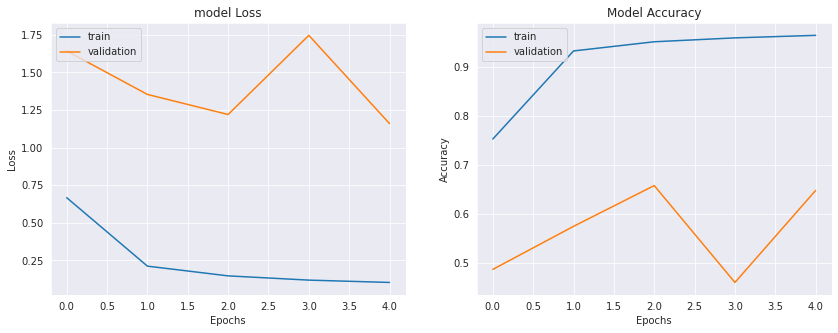

In [ ]:
#Plotting the train and validation accuracy + loss

plt.figure(figsize=(14,5))

plt.subplot(1,2,2)

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])

plt.title('Model Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,1)

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])

plt.title('model Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [ ]:
# Getting the final train, validation, test accuracies and loss

train_loss, train_accu = model4.evaluate(train_generator)
validation_loss, validation_accu = model4.evaluate(validation_generator)
test_loss, test_accu = model4.evaluate(test_generator)
print("Final Train accuracy = {:.2f} , Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(train_accu*100, validation_accu*100, test_accu*100))

7375/7375 [==============================] - 1119s 152ms/step - loss: 0.0843 - accuracy: 0.9718

1588/1588 [==============================] - 129s 81ms/step - loss: 1.1608 - accuracy: 0.6513

775/775 [==============================] - 76s 97ms/step - loss: 0.7987 - accuracy: 0.7826

Final Train accuracy = 97.18 , Validation accuracy = 65.13, Test accuracy = 78.26


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.06      0.03      0.04       700

        frown       0.11      0.07      0.08      1500

      neutral       0.59      0.77      0.66      7500

        smile       0.22      0.12      0.16      3000



     accuracy                           0.49     12700

    macro avg       0.24      0.25      0.24     12700

 weighted avg       0.41      0.49      0.44     12700



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

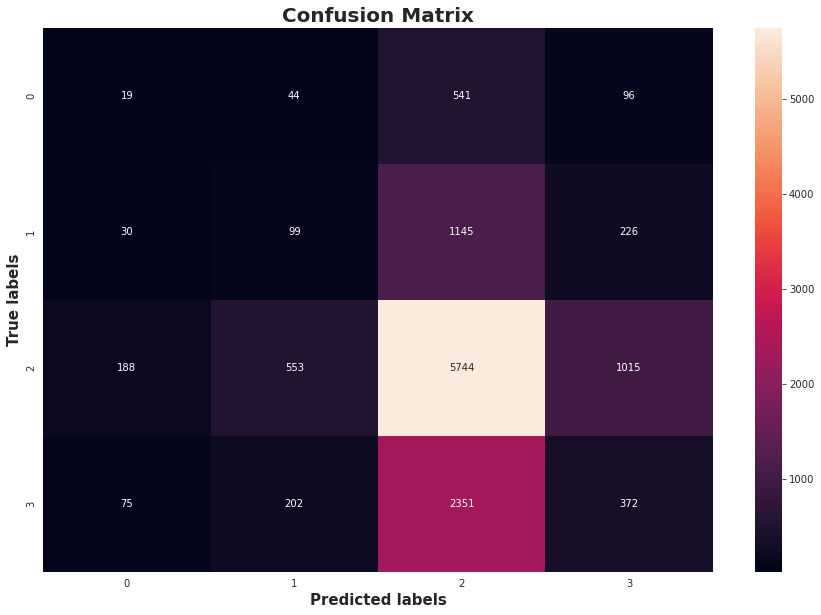

In [ ]:
# Getting classification report and confusion matrix on validation dataset

y_pred = model4.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.15      0.09      0.11      1000

        frown       0.11      0.05      0.07       800

      neutral       0.47      0.67      0.55      2900

        smile       0.26      0.18      0.22      1500



     accuracy                           0.38      6200

    macro avg       0.25      0.25      0.24      6200

 weighted avg       0.32      0.38      0.34      6200



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

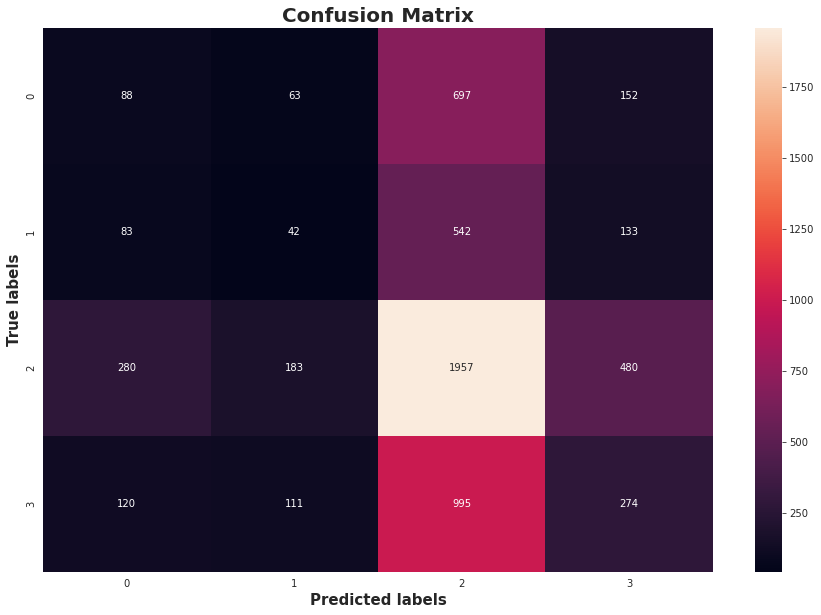

In [ ]:
# Getting classification report and confusion matrix on test dataset

y_pred = model4.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

# 5. 2. Model 5_1 - InceptionResNetV2()- All layers trainable

In [ ]:
conv_base3_2 = tf.keras.applications.InceptionResNetV2(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')




225209952/225209952 [==============================] - 4s 0us/step


In [ ]:
model4_2 = tf.keras.models.Sequential() 

model4_2.add(conv_base3_2)

model4_2.add(Flatten())
model4_2.add(Dense(512, activation='relu'))
model4_2.add(Dropout(0.5))
           
model4_2.add(Dense(4, activation='softmax'))

model4_2.compile(
    optimizer = Adam(learning_rate=0.0001, decay=1e-6), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [ ]:
model4_2.summary()

Model: "sequential_3"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


inception_resnet_v2 (Functio (None, 1000)              55873736  

_________________________________________________________________

flatten_3 (Flatten)          (None, 1000)              0         

_________________________________________________________________

dense_6 (Dense)              (None, 512)               512512    

_________________________________________________________________

dropout_3 (Dropout)          (None, 512)               0         

_________________________________________________________________

dense_7 (Dense)              (None, 4)                 2052      


Total params: 56,388,300

Trainable params: 56,327,756

Non-trainable params: 60,544

_________________________________________________________________


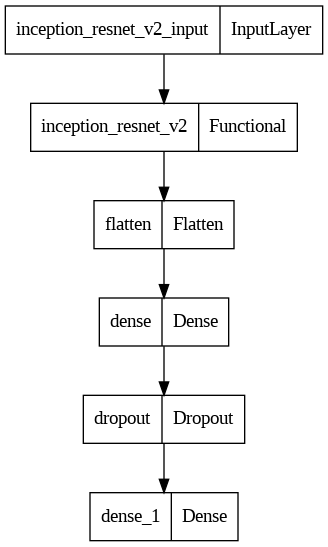

In [ ]:
plot_model(model4_2, 'model4_2.png')

In [ ]:
# Callbacks functions for model checkpoint, early stopping, reduce learning rate on plateau

chk_path = 'model4_2.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training4_2.log')

callbacks4_2 = [checkpoint, reduce_lr, csv_logger]

2023-02-07 21:01:04.481988: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.

2023-02-07 21:01:04.482069: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.

2023-02-07 21:01:05.206040: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.

2023-02-07 21:01:05.206211: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [ ]:
# Training the model

epochs = 5
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history4_2 = model4_2.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    epochs = epochs,
    callbacks=callbacks4_2
                     )

Epoch 1/5

7375/7375 [==============================] - 1849s 248ms/step - loss: 0.6115 - accuracy: 0.7747 - val_loss: 0.9277 - val_accuracy: 0.6696



Epoch 00001: val_loss improved from inf to 0.92769, saving model to model4_2.h5

Epoch 2/5

7375/7375 [==============================] - 1781s 241ms/step - loss: 0.1900 - accuracy: 0.9387 - val_loss: 1.5745 - val_accuracy: 0.5057



Epoch 00002: val_loss did not improve from 0.92769

Epoch 3/5

7375/7375 [==============================] - 1758s 238ms/step - loss: 0.1342 - accuracy: 0.9565 - val_loss: 1.6654 - val_accuracy: 0.5351



Epoch 00003: val_loss did not improve from 0.92769

Epoch 4/5

7375/7375 [==============================] - 1747s 237ms/step - loss: 0.1112 - accuracy: 0.9634 - val_loss: 1.5922 - val_accuracy: 0.5421



Epoch 00004: val_loss did not improve from 0.92769

Epoch 5/5

7375/7375 [==============================] - 1755s 238ms/step - loss: 0.0972 - accuracy: 0.9687 - val_loss: 2.9903 - val_accuracy: 0.4081



Epo

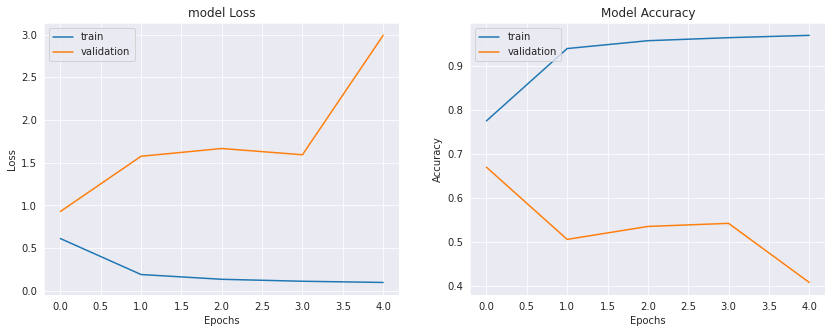

In [ ]:
#Plotting the train and validation accuracy + loss

plt.figure(figsize=(14,5))

plt.subplot(1,2,2)

plt.plot(history4_2.history['accuracy'])
plt.plot(history4_2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,1)

plt.plot(history4_2.history['loss'])
plt.plot(history4_2.history['val_loss'])

plt.title('model Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [ ]:
# Getting the final train, validation, test accuracies and loss

train_loss, train_accu = model4_2.evaluate(train_generator)
validation_loss, validation_accu = model4_2.evaluate(validation_generator)
test_loss, test_accu = model4_2.evaluate(test_generator)
print("Final Train accuracy = {:.2f} , Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(train_accu*100, validation_accu*100, test_accu*100))

7375/7375 [==============================] - 1144s 155ms/step - loss: 0.0931 - accuracy: 0.9706

1588/1588 [==============================] - 129s 81ms/step - loss: 3.0026 - accuracy: 0.4082

775/775 [==============================] - 84s 109ms/step - loss: 0.7328 - accuracy: 0.8013

Final Train accuracy = 97.06 , Validation accuracy = 40.82, Test accuracy = 80.13


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.05      0.00      0.01       700

        frown       0.12      0.50      0.19      1500

      neutral       0.59      0.45      0.51      7500

        smile       0.22      0.04      0.07      3000



     accuracy                           0.33     12700

    macro avg       0.24      0.25      0.19     12700

 weighted avg       0.42      0.33      0.34     12700



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

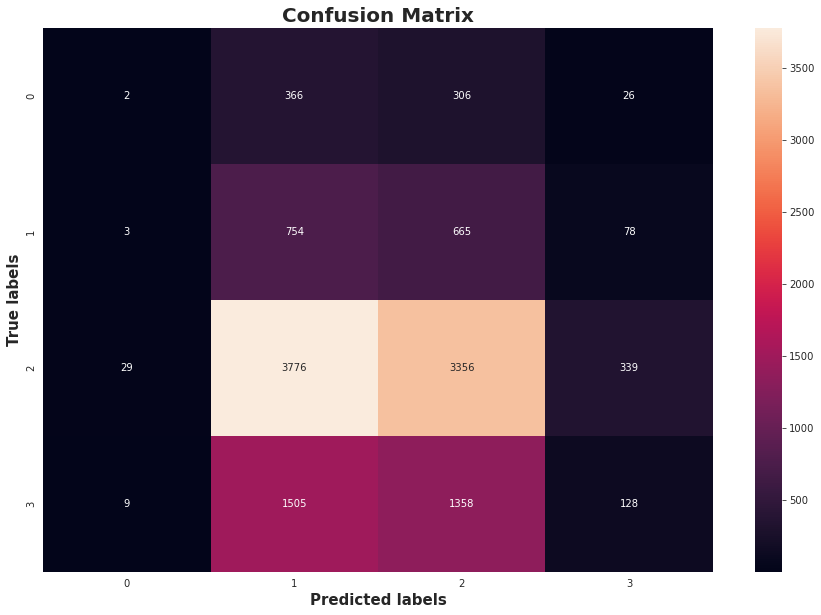

In [ ]:
# Getting classification report and confusion matrix on validation dataset

y_pred = model4_2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.15      0.12      0.13      1000

        frown       0.12      0.10      0.11       800

      neutral       0.47      0.59      0.52      2900

        smile       0.22      0.16      0.18      1500



     accuracy                           0.35      6200

    macro avg       0.24      0.24      0.24      6200

 weighted avg       0.31      0.35      0.32      6200



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

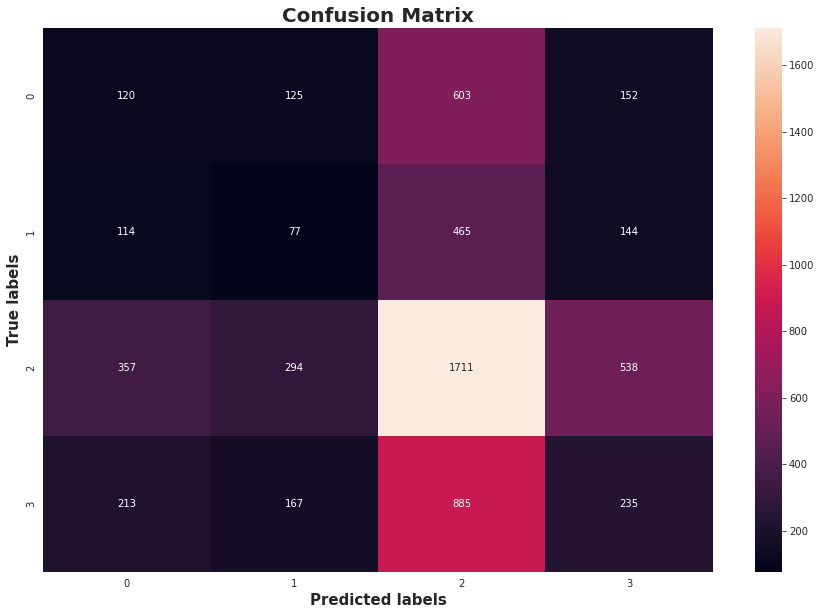

In [ ]:
# Getting classification report and confusion matrix on test dataset

y_pred = model4_2.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

In [ ]:
model4_2.save('model4_2_final.h5')

## Examining results from the "best" model saved based on validation loss

In [ ]:
model4_2_best = tf.keras.models.load_model('/kaggle/working/model4_2.h5')

validation_loss_best, validation_accu_best = model4_2_best.evaluate(validation_generator)
test_loss_best, test_accu_best = model4_2_best.evaluate(test_generator)
print("Best Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(validation_accu_best*100, test_accu_best*100))

1588/1588 [==============================] - 133s 82ms/step - loss: 0.9218 - accuracy: 0.6713

775/775 [==============================] - 63s 81ms/step - loss: 0.5427 - accuracy: 0.8369

Best Validation accuracy = 67.13, Test accuracy = 83.69


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.06      0.06      0.06       700

        frown       0.11      0.08      0.09      1500

      neutral       0.59      0.62      0.60      7500

        smile       0.23      0.24      0.23      3000



     accuracy                           0.43     12700

    macro avg       0.25      0.25      0.25     12700

 weighted avg       0.42      0.43      0.42     12700



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

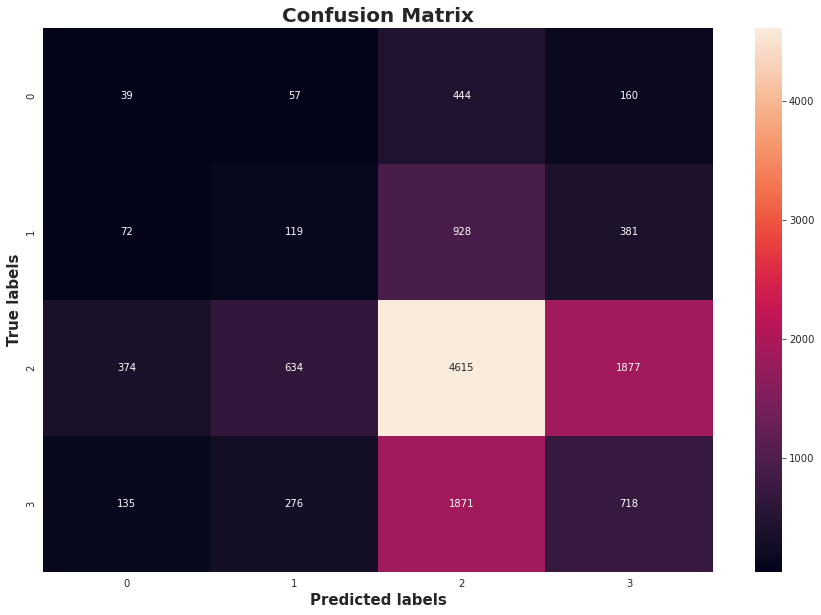

In [ ]:
# Getting classification report and confusion matrix on validation dataset with saved best model

y_pred = model4_2_best.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.17      0.14      0.15      1000

        frown       0.13      0.07      0.09       800

      neutral       0.47      0.60      0.53      2900

        smile       0.26      0.23      0.24      1500



     accuracy                           0.36      6200

    macro avg       0.26      0.26      0.25      6200

 weighted avg       0.33      0.36      0.34      6200



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

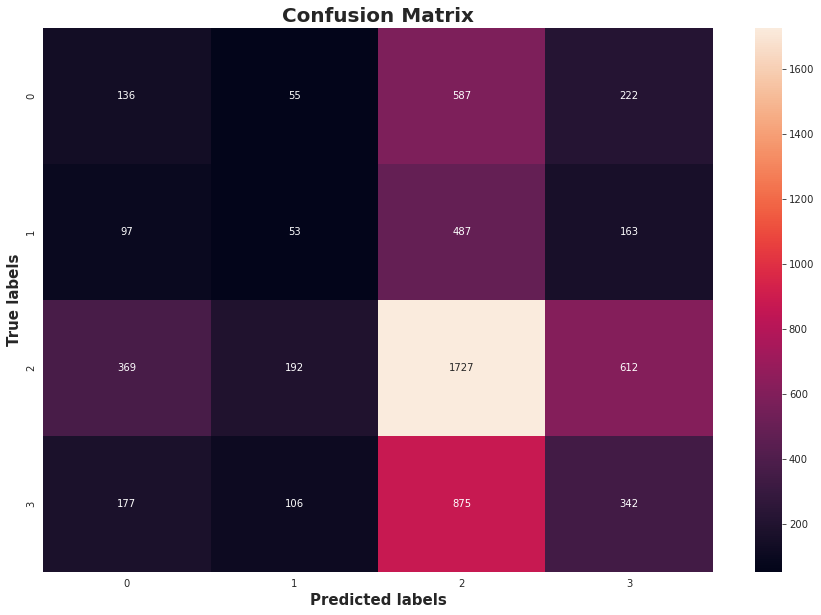

In [ ]:
# Getting classification report and confusion matrix on test dataset with saved best model

y_pred = model4_2_best.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

# 6. Model 5 - MobileNetV3Large() - Transfer learning - Fine tuning

In [ ]:
conv_base4=tf.keras.applications.MobileNetV3Large(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [ ]:
conv_base4.summary()

Model: "MobilenetV3large"

__________________________________________________________________________________________________

Layer (type)                    Output Shape         Param #     Connected to                     


input_3 (InputLayer)            [(None, None, None,  0                                            

__________________________________________________________________________________________________

rescaling_2 (Rescaling)         (None, None, None, 3 0           input_3[0][0]                    

__________________________________________________________________________________________________

Conv (Conv2D)                   (None, None, None, 1 432         rescaling_2[0][0]                

__________________________________________________________________________________________________

Conv/BatchNorm (BatchNormalizat (None, None, None, 1 64          Conv[0][0]                       

________________________________________________________________________

In [ ]:
conv_base4.trainable = True

set_trainable = False
for layer in conv_base4.layers:
    if layer.name == 'expanded_conv_6/expand':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model5 = tf.keras.models.Sequential() 

model5.add(conv_base4)

model5.add(Flatten())
model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.5))
           
model5.add(Dense(4, activation='softmax'))

model5.compile(
    optimizer = Adam(learning_rate=0.0001, decay=1e-6), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [ ]:
model5.summary()

Model: "sequential"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


MobilenetV3large (Functional (None, 1000)              5507432   

_________________________________________________________________

flatten_3 (Flatten)          (None, 1000)              0         

_________________________________________________________________

dense (Dense)                (None, 512)               512512    

_________________________________________________________________

dropout_3 (Dropout)          (None, 512)               0         

_________________________________________________________________

dense_1 (Dense)              (None, 4)                 2052      


Total params: 6,021,996

Trainable params: 5,936,476

Non-trainable params: 85,520

_________________________________________________________________


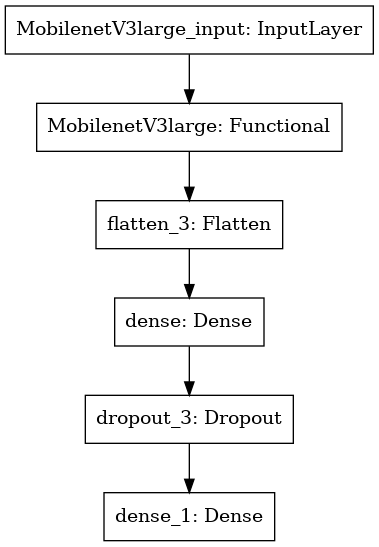

In [ ]:
plot_model(model5, 'model5.png')

In [ ]:
# Callbacks functions for model checkpoint, early stopping, reduce learning rate on plateau

chk_path = 'model5.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training5.log')

callbacks5 = [checkpoint, reduce_lr, csv_logger]

2023-02-07 01:15:40.914274: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.

2023-02-07 01:15:40.914349: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.

2023-02-07 01:15:41.148016: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.

2023-02-07 01:15:41.148258: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [ ]:
# Training the model

epochs = 5
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history5 = model5.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    epochs = epochs,
    callbacks=callbacks5
                     )

2023-02-07 01:16:01.174704: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2023-02-07 01:16:08.463074: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


7375/7375 [==============================] - 1609s 216ms/step - loss: 1.1037 - accuracy: 0.5297 - val_loss: 1.1746 - val_accuracy: 0.5854



Epoch 00001: val_loss improved from inf to 1.17457, saving model to model5.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

  category=CustomMaskWarning)


Epoch 2/5

7375/7375 [==============================] - 1410s 191ms/step - loss: 0.6949 - accuracy: 0.7324 - val_loss: 1.3953 - val_accuracy: 0.5994



Epoch 00002: val_loss did not improve from 1.17457

Epoch 3/5

7375/7375 [==============================] - 1411s 191ms/step - loss: 0.4255 - accuracy: 0.8383 - val_loss: 1.5796 - val_accuracy: 0.5388



Epoch 00003: val_loss did not improve from 1.17457

Epoch 4/5

7375/7375 [==============================] - 1323s 179ms/step - loss: 0.3180 - accuracy: 0.8793 - val_loss: 1.5602 - val_accuracy: 0.5367



Epoch 00004: val_loss did not improve from 1.17457

Epoch 5/5

7375/7375 [==============================] - 1301s 176ms/step - loss: 0.2650 - accuracy: 0.9002 - val_loss: 1.6203 - val_accuracy: 0.5364



Epoch 00005: val_loss did not improve from 1.17457


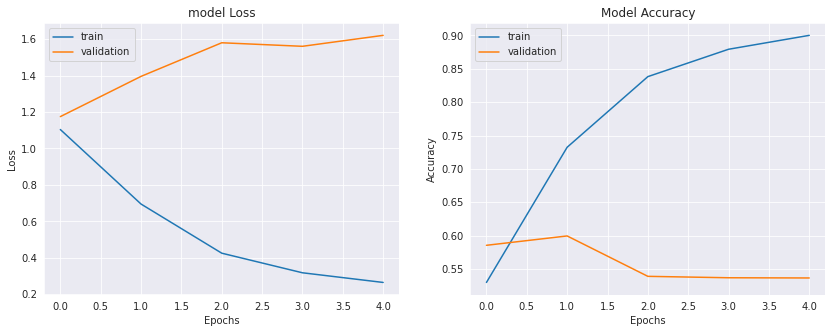

In [ ]:
#Plotting the train and validation accuracy + loss

plt.figure(figsize=(14,5))

plt.subplot(1,2,2)

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])

plt.title('Model Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,1)

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])

plt.title('model Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [ ]:
# Getting the final train, validation, test accuracies and loss

train_loss, train_accu = model5.evaluate(train_generator)
validation_loss, validation_accu = model5.evaluate(validation_generator)
test_loss, test_accu = model5.evaluate(test_generator)
print("Final Train accuracy = {:.2f} , Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(train_accu*100, validation_accu*100, test_accu*100))

7375/7375 [==============================] - 1120s 152ms/step - loss: 0.2931 - accuracy: 0.8891

1588/1588 [==============================] - 116s 73ms/step - loss: 1.6211 - accuracy: 0.5376

775/775 [==============================] - 55s 72ms/step - loss: 2.2001 - accuracy: 0.5113

Final Train accuracy = 88.91 , Validation accuracy = 53.76, Test accuracy = 51.13


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.07      0.01      0.02       700

        frown       0.22      0.00      0.00      1500

      neutral       0.59      0.63      0.61      7500

        smile       0.23      0.35      0.28      3000



     accuracy                           0.45     12700

    macro avg       0.28      0.25      0.23     12700

 weighted avg       0.43      0.45      0.43     12700



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

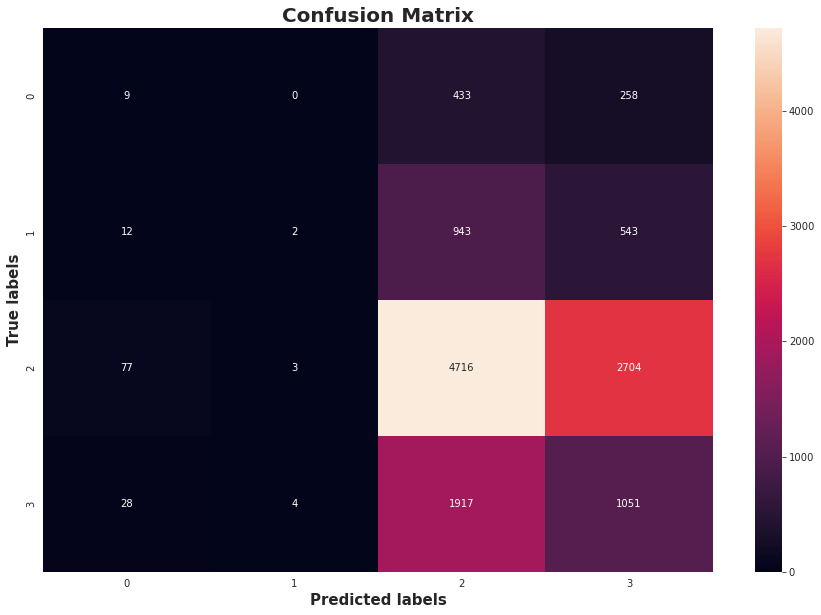

In [ ]:
# Getting classification report and confusion matrix on validation dataset

y_pred = model5.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.15      0.01      0.02      1000

        frown       0.14      0.14      0.14       800

      neutral       0.47      0.44      0.45      2900

        smile       0.25      0.44      0.32      1500



     accuracy                           0.33      6200

    macro avg       0.25      0.26      0.23      6200

 weighted avg       0.32      0.33      0.31      6200



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

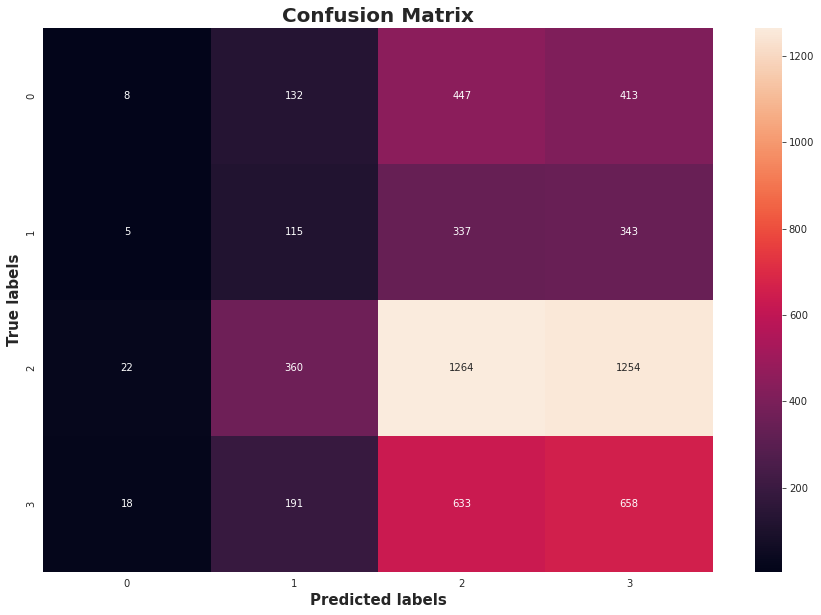

In [ ]:
# Getting classification report and confusion matrix on test dataset

y_pred = model5.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

In [ ]:
model5.save('model5_final.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

  category=CustomMaskWarning)


## Examining results from the "best" model saved based on validation loss

In [ ]:
model5_best = tf.keras.models.load_model('/kaggle/working/model5.h5')

validation_loss_best, validation_accu_best = model5_best.evaluate(validation_generator)
test_loss_best, test_accu_best = model5_best.evaluate(test_generator)
print("Best Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(validation_accu_best*100, test_accu_best*100))

1588/1588 [==============================] - 100s 63ms/step - loss: 1.1758 - accuracy: 0.5828

775/775 [==============================] - 48s 61ms/step - loss: 1.2588 - accuracy: 0.5561

Best Validation accuracy = 58.28, Test accuracy = 55.61


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.00      0.00      0.00       700

        frown       0.00      0.00      0.00      1500

      neutral       0.59      0.98      0.74      7500

        smile       0.23      0.02      0.04      3000



     accuracy                           0.58     12700

    macro avg       0.20      0.25      0.19     12700

 weighted avg       0.40      0.58      0.44     12700



Confusion Matrix: 


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

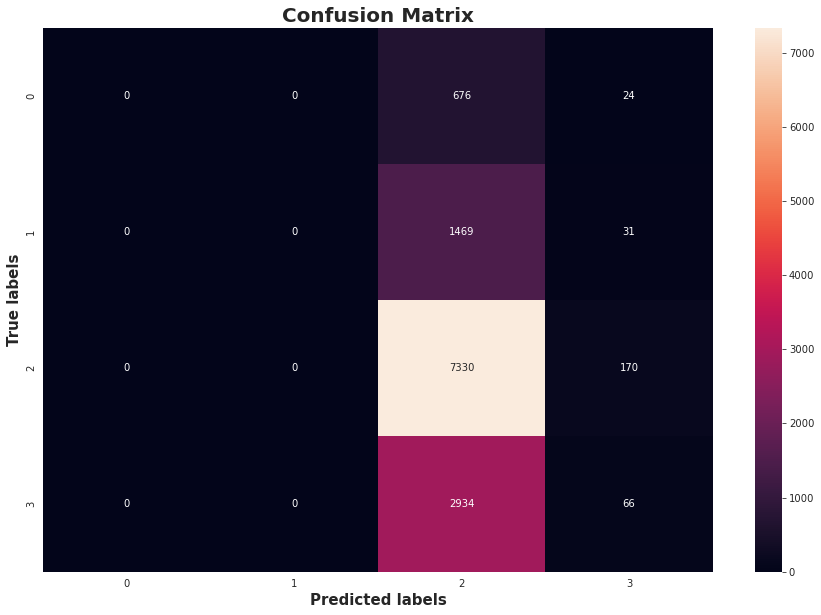

In [ ]:
# Getting classification report and confusion matrix on validation dataset with saved best model

y_pred = model5_best.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.00      0.00      0.00      1000

        frown       0.00      0.00      0.00       800

      neutral       0.47      0.87      0.61      2900

        smile       0.25      0.13      0.18      1500



     accuracy                           0.44      6200

    macro avg       0.18      0.25      0.20      6200

 weighted avg       0.28      0.44      0.33      6200



Confusion Matrix: 


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

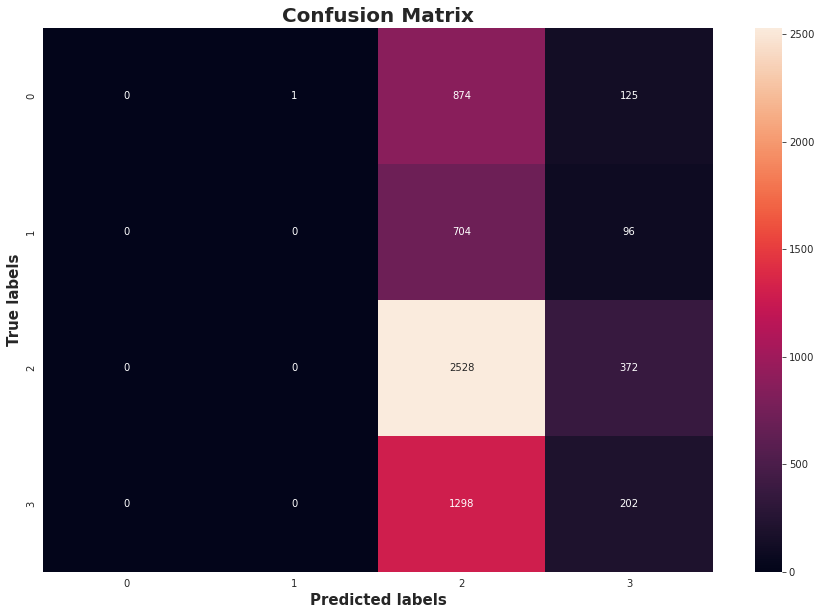

In [ ]:
# Getting classification report and confusion matrix on test dataset with saved best model

y_pred = model5_best.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

# 7. 1. Model 6 - EfficientNet() - Transfer learning - Fine tuning

In [ ]:
conv_base5 = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')



16809984/16804768 [==============================] - 0s 0us/step

16818176/16804768 [==============================] - 0s 0us/step


In [ ]:
conv_base5.summary()

Model: "efficientnet-b0"

__________________________________________________________________________________________________

Layer (type)                    Output Shape         Param #     Connected to                     


input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            

__________________________________________________________________________________________________

stem_conv (Conv2D)              (None, 112, 112, 32) 864         input_4[0][0]                    

__________________________________________________________________________________________________

stem_bn (BatchNormalization)    (None, 112, 112, 32) 128         stem_conv[0][0]                  

__________________________________________________________________________________________________

stem_activation (Activation)    (None, 112, 112, 32) 0           stem_bn[0][0]                    

_________________________________________________________________________

In [ ]:
conv_base5.trainable = True

set_trainable = False
for layer in conv_base5.layers:
    if layer.name == 'block4a_expand_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model6= tf.keras.models.Sequential() 

model6.add(conv_base5)

model6.add(Flatten())
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.5))
           
model6.add(Dense(4, activation='softmax'))

model6.compile(
    optimizer = Adam(learning_rate=0.001, decay=1e-6), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [ ]:
model6.summary()

Model: "sequential_1"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


efficientnet-b0 (Functional) (None, 7, 7, 1280)        4049564   

_________________________________________________________________

flatten_4 (Flatten)          (None, 62720)             0         

_________________________________________________________________

dense_2 (Dense)              (None, 512)               32113152  

_________________________________________________________________

dropout_4 (Dropout)          (None, 512)               0         

_________________________________________________________________

dense_3 (Dense)              (None, 4)                 2052      


Total params: 36,164,768

Trainable params: 36,057,022

Non-trainable params: 107,746

_________________________________________________________________


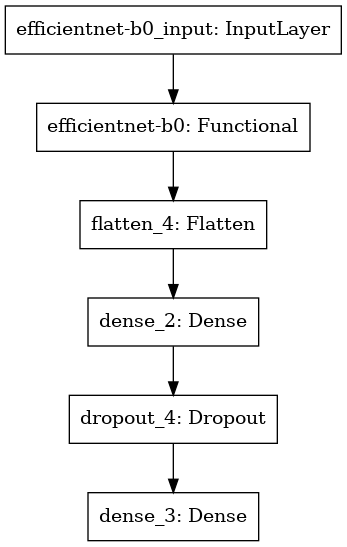

In [ ]:
plot_model(model6, 'model6.png')

In [ ]:
# Callbacks functions for model checkpoint, early stopping, reduce learning rate on plateau

chk_path = 'model6.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training6.log')

callbacks6 = [checkpoint, reduce_lr, csv_logger]

2023-02-07 04:05:52.264004: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.

2023-02-07 04:05:52.264141: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.

2023-02-07 04:05:53.213399: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.

2023-02-07 04:05:53.213598: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [ ]:
# Training the model

epochs = 5
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history6 = model6.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    epochs = epochs,
    callbacks=callbacks6
                     )

Epoch 1/5

7375/7375 [==============================] - 1551s 209ms/step - loss: 1.2609 - accuracy: 0.5059 - val_loss: 1.0815 - val_accuracy: 0.5906



Epoch 00001: val_loss improved from inf to 1.08151, saving model to model6.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

  category=CustomMaskWarning)


Epoch 2/5

7375/7375 [==============================] - 1376s 187ms/step - loss: 1.1826 - accuracy: 0.5085 - val_loss: 1.0784 - val_accuracy: 0.5906



Epoch 00002: val_loss improved from 1.08151 to 1.07844, saving model to model6.h5

Epoch 3/5

7375/7375 [==============================] - 1205s 163ms/step - loss: 1.1826 - accuracy: 0.5085 - val_loss: 1.0807 - val_accuracy: 0.5904



Epoch 00003: val_loss did not improve from 1.07844

Epoch 4/5

7375/7375 [==============================] - 1194s 162ms/step - loss: 1.1826 - accuracy: 0.5085 - val_loss: 1.0804 - val_accuracy: 0.5906



Epoch 00004: val_loss did not improve from 1.07844

Epoch 5/5

7375/7375 [==============================] - 1169s 158ms/step - loss: 1.1826 - accuracy: 0.5085 - val_loss: 1.0837 - val_accuracy: 0.5905



Epoch 00005: val_loss did not improve from 1.07844


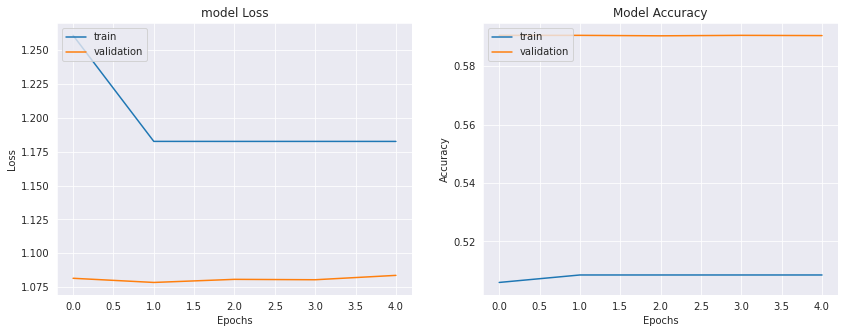

In [ ]:
#Plotting the train and validation accuracy + loss

plt.figure(figsize=(14,5))

plt.subplot(1,2,2)

plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])

plt.title('Model Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,1)

plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])

plt.title('model Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [ ]:
# Getting the final train, validation, test accuracies and loss

train_loss, train_accu = model6.evaluate(train_generator)
validation_loss, validation_accu = model6.evaluate(validation_generator)
test_loss, test_accu = model6.evaluate(test_generator)
print("Final Train accuracy = {:.2f} , Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(train_accu*100, validation_accu*100, test_accu*100))

7375/7375 [==============================] - 997s 135ms/step - loss: 1.1826 - accuracy: 0.5085

1588/1588 [==============================] - 97s 61ms/step - loss: 1.0836 - accuracy: 0.5906

775/775 [==============================] - 79s 102ms/step - loss: 1.2944 - accuracy: 0.4677

Final Train accuracy = 50.85 , Validation accuracy = 59.06, Test accuracy = 46.77


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.00      0.00      0.00       700

        frown       0.00      0.00      0.00      1500

      neutral       0.59      1.00      0.74      7500

        smile       0.00      0.00      0.00      3000



     accuracy                           0.59     12700

    macro avg       0.15      0.25      0.19     12700

 weighted avg       0.35      0.59      0.44     12700



Confusion Matrix: 


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

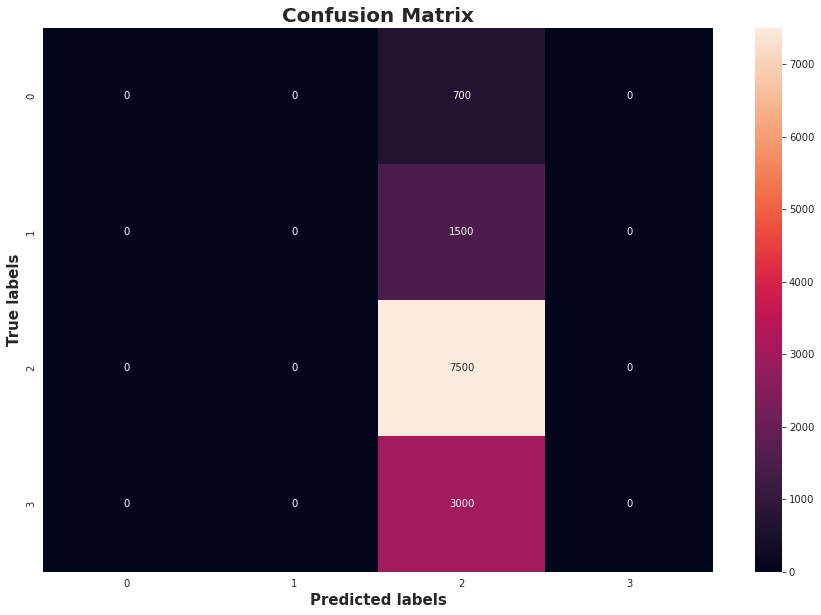

In [ ]:
# Getting classification report and confusion matrix on validation dataset

y_pred = model6.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.00      0.00      0.00      1000

        frown       0.00      0.00      0.00       800

      neutral       0.47      1.00      0.64      2900

        smile       0.00      0.00      0.00      1500



     accuracy                           0.47      6200

    macro avg       0.12      0.25      0.16      6200

 weighted avg       0.22      0.47      0.30      6200



Confusion Matrix: 


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

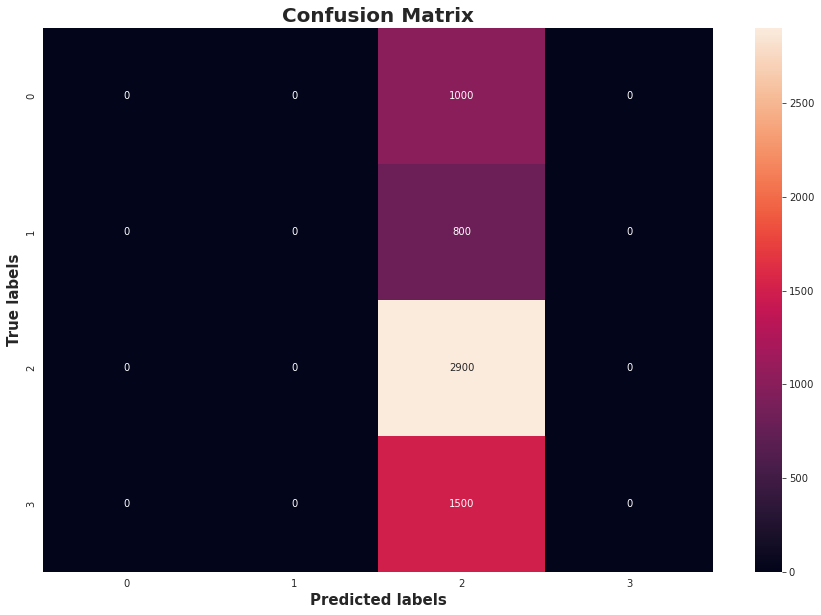

In [ ]:
# Getting classification report and confusion matrix on test dataset

y_pred = model6.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

# 7. 2. Model 7 - EfficientNet() - All layers trainable

In [ ]:
conv_base6 = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
# for layer in conv_base6.layers:
#     layer.trainable = True

In [ ]:
model7= tf.keras.models.Sequential() 

model7.add(conv_base6)

model7.add(Flatten())
model7.add(Dense(512, activation='relu'))
model7.add(Dropout(0.5))
           
model7.add(Dense(4, activation='softmax'))

model7.compile(
    optimizer = Adam(learning_rate=0.0001, decay=1e-6), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [ ]:
model7.summary()

Model: "sequential"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


efficientnet-b0 (Functional) (None, 7, 7, 1280)        4049564   

_________________________________________________________________

flatten (Flatten)            (None, 62720)             0         

_________________________________________________________________

dense (Dense)                (None, 512)               32113152  

_________________________________________________________________

dropout (Dropout)            (None, 512)               0         

_________________________________________________________________

dense_1 (Dense)              (None, 4)                 2052      


Total params: 36,164,768

Trainable params: 36,122,752

Non-trainable params: 42,016

_________________________________________________________________


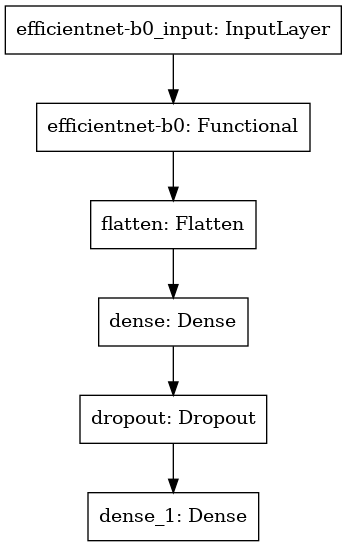

In [ ]:
plot_model(model7, 'model7.png')

In [ ]:
# Callbacks functions for model checkpoint, early stopping, reduce learning rate on plateau

chk_path = 'model7.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training7.log')

callbacks7 = [checkpoint, reduce_lr, csv_logger]

2023-02-07 12:43:49.283494: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.

2023-02-07 12:43:49.283771: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.

2023-02-07 12:43:49.286372: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 2 GPUs

2023-02-07 12:43:49.740779: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.

2023-02-07 12:43:49.740996: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [ ]:
# Training the model

epochs = 5
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history7 = model7.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    epochs = epochs,
    callbacks=callbacks7
                     )

2023-02-07 12:44:08.163616: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2023-02-07 12:44:17.168580: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


7375/7375 [==============================] - 1700s 228ms/step - loss: 0.6176 - accuracy: 0.7659 - val_loss: 1.2385 - val_accuracy: 0.6453



Epoch 00001: val_loss improved from inf to 1.23847, saving model to model7.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

  category=CustomMaskWarning)


Epoch 2/5

7375/7375 [==============================] - 1396s 189ms/step - loss: 0.2629 - accuracy: 0.9077 - val_loss: 1.7162 - val_accuracy: 0.6148



Epoch 00002: val_loss did not improve from 1.23847

Epoch 3/5

7375/7375 [==============================] - 1376s 187ms/step - loss: 0.2069 - accuracy: 0.9292 - val_loss: 1.9661 - val_accuracy: 0.6241



Epoch 00003: val_loss did not improve from 1.23847

Epoch 4/5

7375/7375 [==============================] - 1382s 187ms/step - loss: 0.1717 - accuracy: 0.9424 - val_loss: 1.6431 - val_accuracy: 0.6864



Epoch 00004: val_loss did not improve from 1.23847

Epoch 5/5

7375/7375 [==============================] - 1385s 188ms/step - loss: 0.1498 - accuracy: 0.9499 - val_loss: 2.6553 - val_accuracy: 0.5524



Epoch 00005: val_loss did not improve from 1.23847


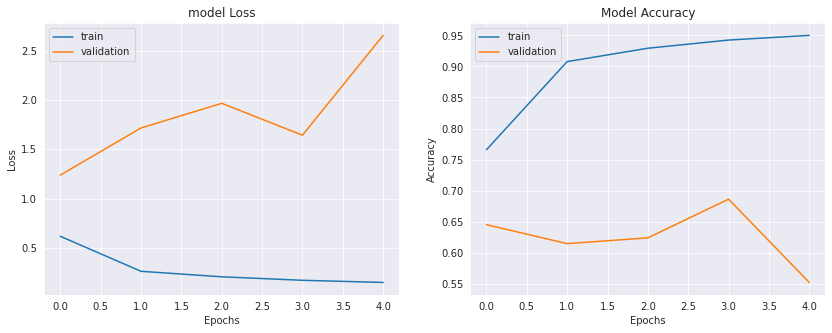

In [ ]:
#Plotting the train and validation accuracy + loss

plt.figure(figsize=(14,5))

plt.subplot(1,2,2)

plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])

plt.title('Model Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,1)

plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])

plt.title('model Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [ ]:
# Getting the final train, validation, test accuracies and loss

train_loss, train_accu = model7.evaluate(train_generator)
validation_loss, validation_accu = model7.evaluate(validation_generator)
test_loss, test_accu = model7.evaluate(test_generator)
print("Final Train accuracy = {:.2f} , Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(train_accu*100, validation_accu*100, test_accu*100))

7375/7375 [==============================] - 1022s 139ms/step - loss: 0.1230 - accuracy: 0.9632

1588/1588 [==============================] - 102s 64ms/step - loss: 2.6414 - accuracy: 0.5524

775/775 [==============================] - 81s 105ms/step - loss: 0.7884 - accuracy: 0.8447

Final Train accuracy = 96.32 , Validation accuracy = 55.24, Test accuracy = 84.47


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.04      0.02      0.02       700

        frown       0.16      0.02      0.03      1500

      neutral       0.59      0.51      0.55      7500

        smile       0.24      0.46      0.32      3000



     accuracy                           0.42     12700

    macro avg       0.26      0.25      0.23     12700

 weighted avg       0.43      0.42      0.40     12700



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

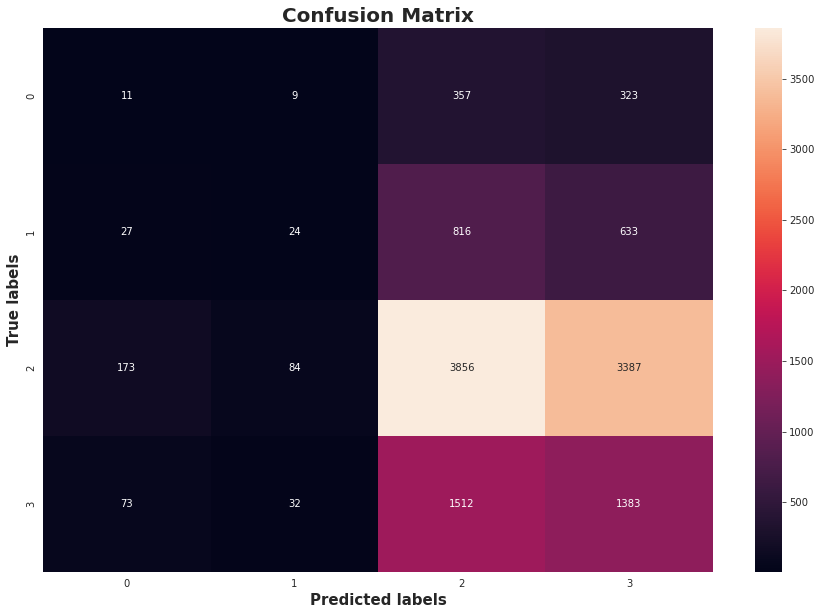

In [ ]:
# Getting classification report and confusion matrix on validation dataset

y_pred = model7.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.16      0.11      0.13      1000

        frown       0.13      0.14      0.14       800

      neutral       0.47      0.55      0.51      2900

        smile       0.24      0.22      0.23      1500



     accuracy                           0.34      6200

    macro avg       0.25      0.25      0.25      6200

 weighted avg       0.32      0.34      0.33      6200



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

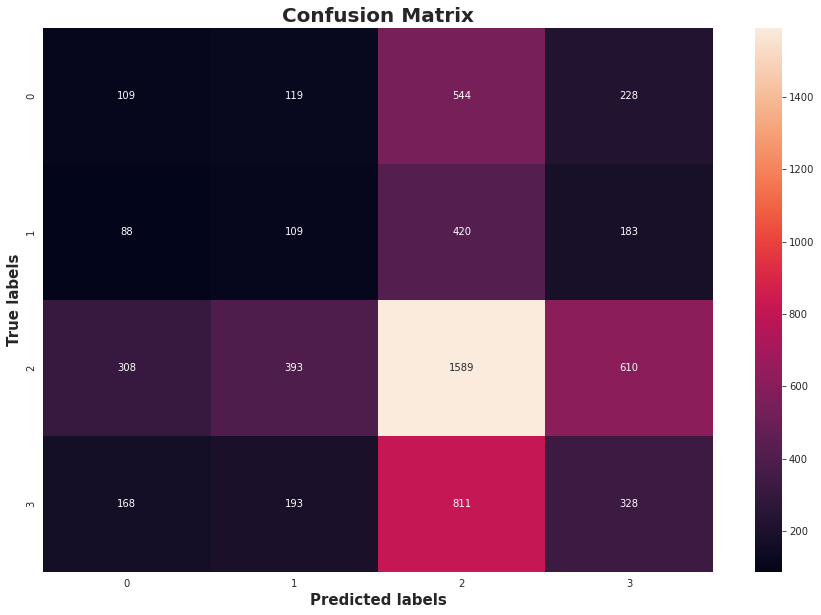

In [ ]:
# Getting classification report and confusion matrix on test dataset

y_pred = model7.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

In [ ]:
model7.save('model7_final.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

  category=CustomMaskWarning)


## Examining results from the "best" model saved based on validation loss

In [ ]:
model7_best = tf.keras.models.load_model('/kaggle/working/model7.h5')

validation_loss_best, validation_accu_best = model7_best.evaluate(validation_generator)
test_loss_best, test_accu_best = model7_best.evaluate(test_generator)
print("Best Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(validation_accu_best*100, test_accu_best*100))

1588/1588 [==============================] - 107s 66ms/step - loss: 1.2383 - accuracy: 0.6432

775/775 [==============================] - 49s 64ms/step - loss: 0.7522 - accuracy: 0.7795

Best Validation accuracy = 64.32, Test accuracy = 77.95


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.06      0.04      0.05       700

        frown       0.12      0.10      0.11      1500

      neutral       0.59      0.64      0.62      7500

        smile       0.24      0.24      0.24      3000



     accuracy                           0.45     12700

    macro avg       0.26      0.26      0.25     12700

 weighted avg       0.43      0.45      0.44     12700



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

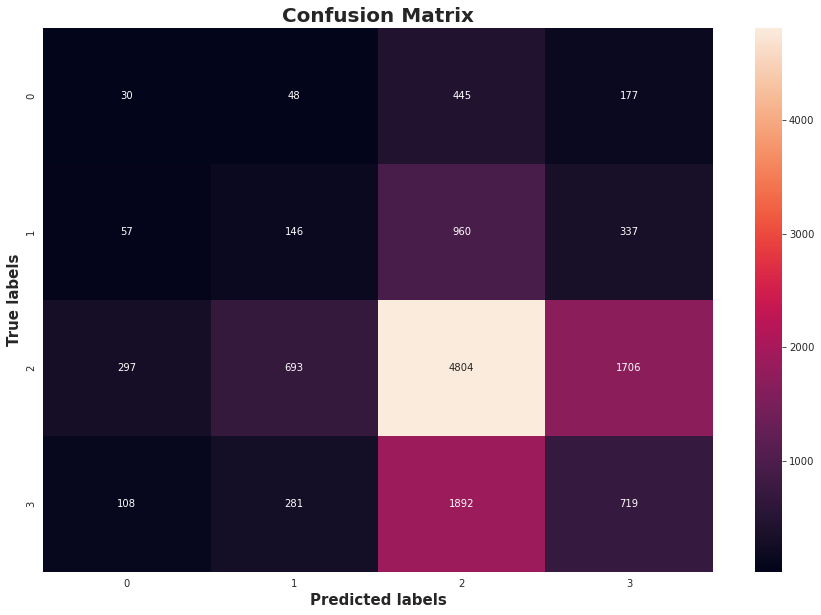

In [ ]:
# Getting classification report and confusion matrix on validation dataset with saved best model

y_pred = model7_best.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.13      0.09      0.11      1000

        frown       0.12      0.09      0.10       800

      neutral       0.47      0.64      0.54      2900

        smile       0.25      0.16      0.20      1500



     accuracy                           0.37      6200

    macro avg       0.24      0.25      0.24      6200

 weighted avg       0.32      0.37      0.33      6200



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

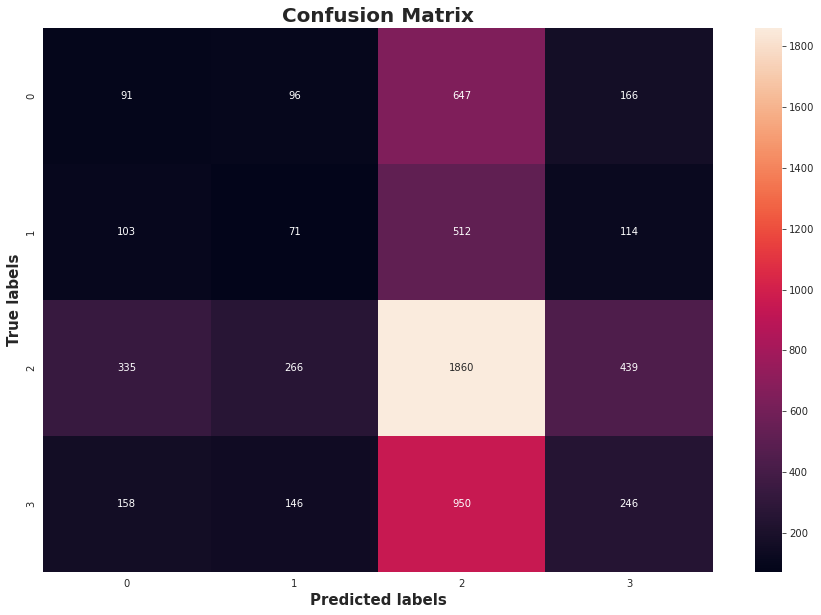

In [ ]:
# Getting classification report and confusion matrix on test dataset with saved best model

y_pred = model7_best.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

# 8. Model 8 - InceptionV3() - All layers trainable

In [4]:
conv_base7=tf.keras.applications.InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [ ]:
conv_base7.summary()

Model: "inception_v3"

__________________________________________________________________________________________________

Layer (type)                    Output Shape         Param #     Connected to                     


input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            

__________________________________________________________________________________________________

conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_3[0][0]                    

__________________________________________________________________________________________________

batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     

__________________________________________________________________________________________________

activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        

____________________________________________________________________________

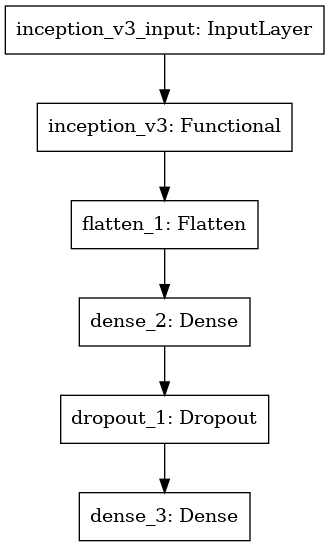

In [ ]:
plot_model(model8, 'model8.png')

In [5]:
model8= tf.keras.models.Sequential() 

model8.add(conv_base7)

model8.add(Flatten())
model8.add(Dense(512, activation='relu'))
model8.add(Dropout(0.5))
           
model8.add(Dense(4, activation='softmax'))

model8.compile(
    optimizer = Adam(learning_rate=0.0001, decay=1e-6), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [6]:
model8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               26214912  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 48,019,748
Trainable params: 47,985,316
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
# Callbacks functions for model checkpoint, early stopping, reduce learning rate on plateau

chk_path = 'model8.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training8.log')

callbacks8 = [checkpoint, reduce_lr, csv_logger]

2023-02-07 15:18:29.584938: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.

2023-02-07 15:18:29.585198: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.

2023-02-07 15:18:30.603407: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.

2023-02-07 15:18:30.604217: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [ ]:
# Training the model

epochs = 5
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history8 = model8.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    epochs = epochs,
    callbacks=callbacks8
                     )

Epoch 1/5

7375/7375 [==============================] - 1428s 193ms/step - loss: 0.5984 - accuracy: 0.7814 - val_loss: 1.3302 - val_accuracy: 0.6049



Epoch 00001: val_loss improved from inf to 1.33021, saving model to model8.h5

Epoch 2/5

7375/7375 [==============================] - 1322s 179ms/step - loss: 0.2340 - accuracy: 0.9250 - val_loss: 1.1852 - val_accuracy: 0.7132



Epoch 00002: val_loss improved from 1.33021 to 1.18521, saving model to model8.h5

Epoch 3/5

7375/7375 [==============================] - 1295s 176ms/step - loss: 0.1756 - accuracy: 0.9428 - val_loss: 1.6144 - val_accuracy: 0.6875



Epoch 00003: val_loss did not improve from 1.18521

Epoch 4/5

7375/7375 [==============================] - 1288s 175ms/step - loss: 0.1479 - accuracy: 0.9524 - val_loss: 1.5152 - val_accuracy: 0.6049



Epoch 00004: val_loss did not improve from 1.18521

Epoch 5/5

7375/7375 [==============================] - 1298s 176ms/step - loss: 0.1309 - accuracy: 0.9574 - val_loss: 1.2973 

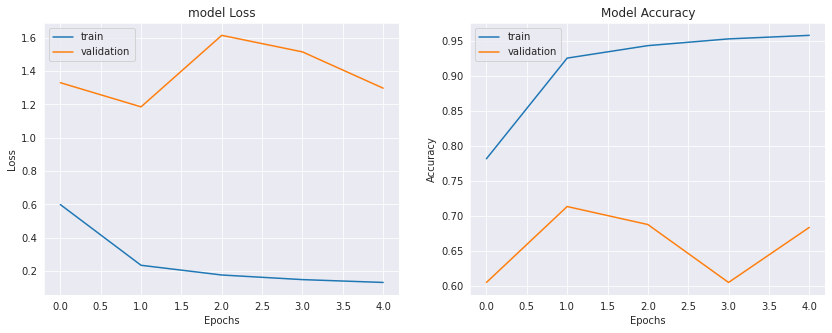

In [ ]:
#Plotting the train and validation accuracy + loss

plt.figure(figsize=(14,5))

plt.subplot(1,2,2)

plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])

plt.title('Model Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,1)

plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])

plt.title('model Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [ ]:
# Getting the final train, validation, test accuracies and loss

train_loss, train_accu = model8.evaluate(train_generator)
validation_loss, validation_accu = model8.evaluate(validation_generator)
test_loss, test_accu = model8.evaluate(test_generator)
print("Final Train accuracy = {:.2f} , Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(train_accu*100, validation_accu*100, test_accu*100))

7375/7375 [==============================] - 1076s 146ms/step - loss: 0.1163 - accuracy: 0.9582

1588/1588 [==============================] - 106s 67ms/step - loss: 1.2882 - accuracy: 0.6834

775/775 [==============================] - 72s 92ms/step - loss: 0.6817 - accuracy: 0.8544

Final Train accuracy = 95.82 , Validation accuracy = 68.34, Test accuracy = 85.44


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.08      0.05      0.06       700

        frown       0.10      0.16      0.12      1500

      neutral       0.59      0.62      0.60      7500

        smile       0.22      0.15      0.18      3000



     accuracy                           0.42     12700

    macro avg       0.25      0.24      0.24     12700

 weighted avg       0.42      0.42      0.42     12700



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

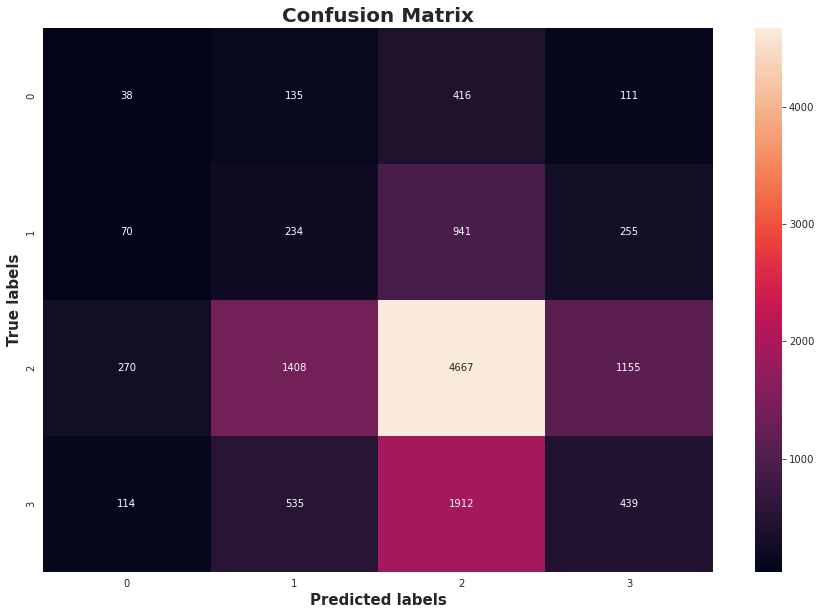

In [ ]:
# Getting classification report and confusion matrix on validation dataset

y_pred = model8.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.14      0.09      0.11      1000

        frown       0.11      0.09      0.10       800

      neutral       0.47      0.58      0.52      2900

        smile       0.23      0.19      0.21      1500



     accuracy                           0.35      6200

    macro avg       0.24      0.24      0.24      6200

 weighted avg       0.31      0.35      0.32      6200



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

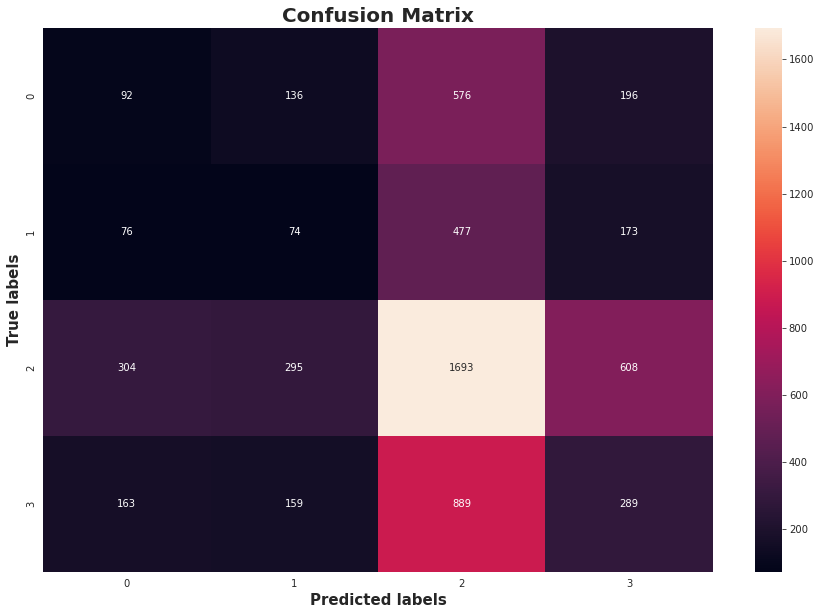

In [ ]:
# Getting classification report and confusion matrix on test dataset

y_pred = model8.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

In [ ]:
model8.save('model8_final.h5')

## Examining results from the "best" model saved based on validation loss

In [ ]:
model8_best = tf.keras.models.load_model('/kaggle/working/model8.h5')

validation_loss_best, validation_accu_best = model8_best.evaluate(validation_generator)
test_loss_best, test_accu_best = model8_best.evaluate(test_generator)
print("Best Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(validation_accu_best*100, test_accu_best*100))

1588/1588 [==============================] - 110s 68ms/step - loss: 1.1791 - accuracy: 0.7149

775/775 [==============================] - 48s 62ms/step - loss: 0.8523 - accuracy: 0.8418

Best Validation accuracy = 71.49, Test accuracy = 84.18


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.06      0.04      0.05       700

        frown       0.12      0.08      0.09      1500

      neutral       0.59      0.71      0.64      7500

        smile       0.24      0.19      0.21      3000



     accuracy                           0.47     12700

    macro avg       0.25      0.25      0.25     12700

 weighted avg       0.42      0.47      0.44     12700



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

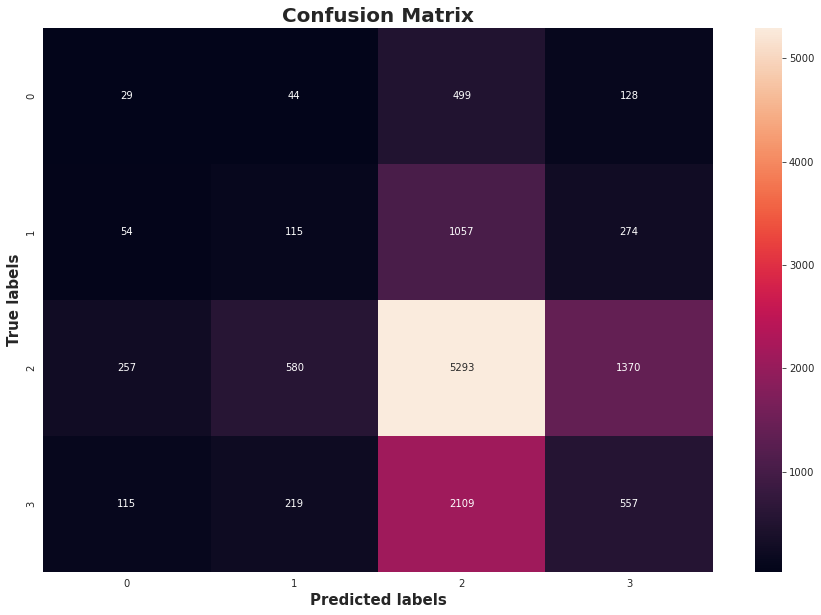

In [ ]:
# Getting classification report and confusion matrix on validation dataset with saved best model

y_pred = model8_best.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.18      0.12      0.14      1000

        frown       0.16      0.10      0.12       800

      neutral       0.47      0.62      0.54      2900

        smile       0.23      0.19      0.20      1500



     accuracy                           0.37      6200

    macro avg       0.26      0.26      0.25      6200

 weighted avg       0.32      0.37      0.34      6200



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

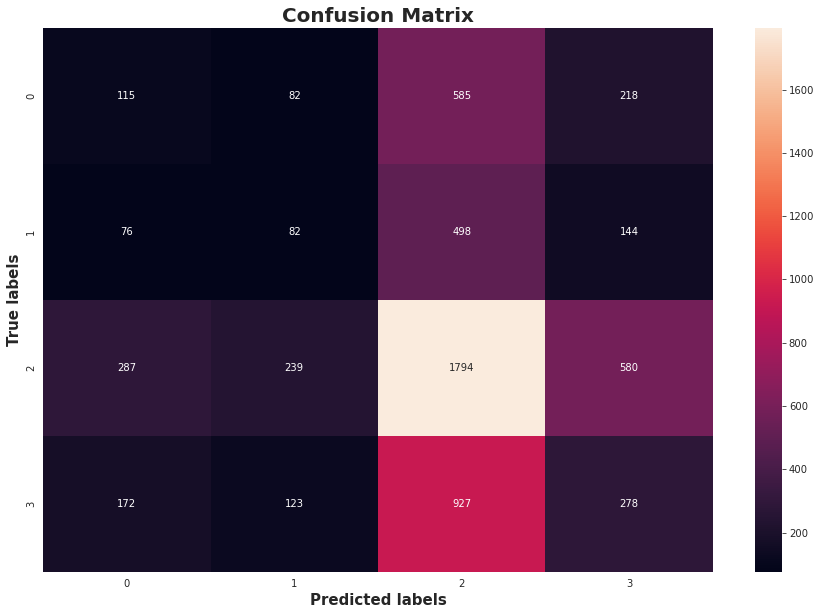

In [ ]:
# Getting classification report and confusion matrix on test dataset with saved best model

y_pred = model8_best.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

# 9. Model 9 - Xception() - All layers trainable

In [8]:
conv_base8=tf.keras.applications.Xception(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

83697664/83683744 [==============================] - 0s 0us/step


In [5]:
conv_base8.summary()

Model: "xception"

__________________________________________________________________________________________________

Layer (type)                    Output Shape         Param #     Connected to                     


input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            

__________________________________________________________________________________________________

block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    

__________________________________________________________________________________________________

block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               

__________________________________________________________________________________________________

block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            

________________________________________________________________________________

In [9]:
model9= tf.keras.models.Sequential() 

model9.add(conv_base8)

model9.add(Flatten())
model9.add(Dense(512, activation='relu'))
model9.add(Dropout(0.5))
           
model9.add(Dense(4, activation='softmax'))

model9.compile(
    optimizer = Adam(learning_rate=0.0001, decay=1e-6), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [10]:
model9.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2052      
Total params: 72,244,268
Trainable params: 72,189,740
Non-trainable params: 54,528
_________________________________________________________________


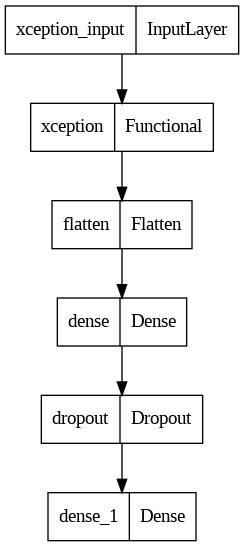

In [6]:
plot_model(model9, 'model9.png')

In [ ]:
# Callbacks functions for model checkpoint, early stopping, reduce learning rate on plateau

chk_path = 'model9.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training9.log')

callbacks9 = [checkpoint, reduce_lr, csv_logger]

2023-02-07 18:15:40.770288: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.

2023-02-07 18:15:40.770341: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.

2023-02-07 18:15:41.387493: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.

2023-02-07 18:15:41.387670: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [ ]:
# Training the model

epochs = 5
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

history9 = model9.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    epochs = epochs,
    callbacks=callbacks9
                     )

Epoch 1/5

7375/7375 [==============================] - 1567s 212ms/step - loss: 0.4081 - accuracy: 0.8491 - val_loss: 1.2691 - val_accuracy: 0.6274



Epoch 00001: val_loss improved from inf to 1.26910, saving model to model9.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

  category=CustomMaskWarning)


Epoch 2/5

7375/7375 [==============================] - 1553s 211ms/step - loss: 0.1744 - accuracy: 0.9409 - val_loss: 1.0468 - val_accuracy: 0.6462



Epoch 00002: val_loss improved from 1.26910 to 1.04681, saving model to model9.h5

Epoch 3/5

7375/7375 [==============================] - 1549s 210ms/step - loss: 0.1329 - accuracy: 0.9561 - val_loss: 1.8434 - val_accuracy: 0.6482



Epoch 00003: val_loss did not improve from 1.04681

Epoch 4/5

7375/7375 [==============================] - 1545s 209ms/step - loss: 0.1131 - accuracy: 0.9633 - val_loss: 1.5927 - val_accuracy: 0.6380



Epoch 00004: val_loss did not improve from 1.04681

Epoch 5/5

7375/7375 [==============================] - 1523s 207ms/step - loss: 0.1013 - accuracy: 0.9682 - val_loss: 1.3888 - val_accuracy: 0.7006



Epoch 00005: val_loss did not improve from 1.04681


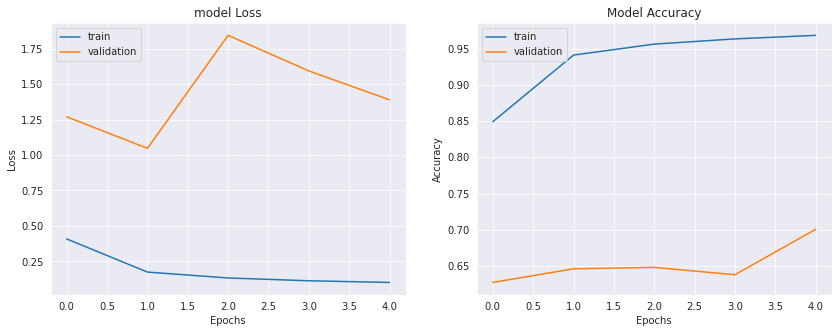

In [ ]:
#Plotting the train and validation accuracy + loss

plt.figure(figsize=(14,5))

plt.subplot(1,2,2)

plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])

plt.title('Model Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1,2,1)

plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])

plt.title('model Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [ ]:
# Getting the final train, validation, test accuracies and loss

train_loss, train_accu = model9.evaluate(train_generator)
validation_loss, validation_accu = model9.evaluate(validation_generator)
test_loss, test_accu = model9.evaluate(test_generator)
print("Final Train accuracy = {:.2f} , Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(train_accu*100, validation_accu*100, test_accu*100))

7375/7375 [==============================] - 1032s 140ms/step - loss: 0.0893 - accuracy: 0.9661

1588/1588 [==============================] - 108s 68ms/step - loss: 1.4006 - accuracy: 0.7046

775/775 [==============================] - 56s 72ms/step - loss: 0.8117 - accuracy: 0.8387

Final Train accuracy = 96.61 , Validation accuracy = 70.46, Test accuracy = 83.87


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.06      0.06      0.06       700

        frown       0.11      0.12      0.11      1500

      neutral       0.60      0.51      0.55      7500

        smile       0.24      0.30      0.27      3000



     accuracy                           0.39     12700

    macro avg       0.25      0.25      0.25     12700

 weighted avg       0.42      0.39      0.40     12700



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

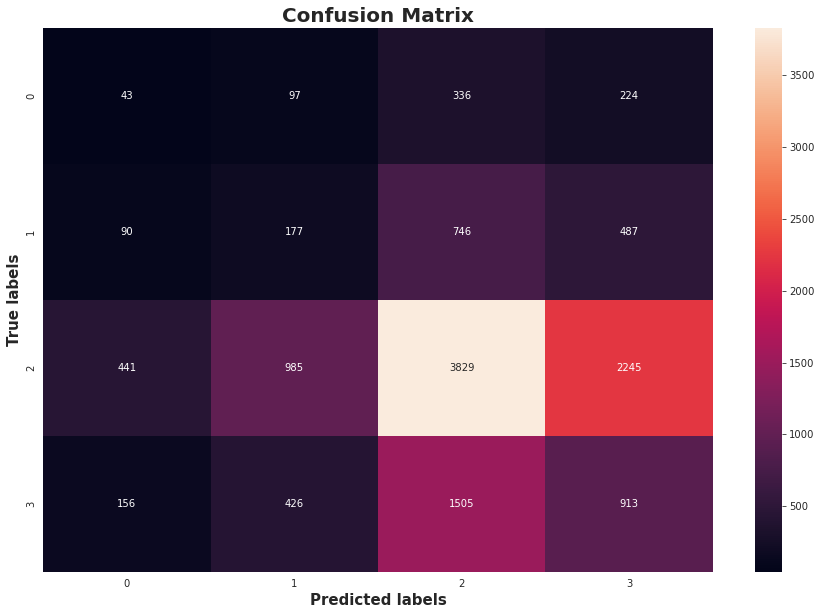

In [ ]:
# Getting classification report and confusion matrix on validation dataset

y_pred = model9.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.18      0.15      0.16      1000

        frown       0.12      0.14      0.13       800

      neutral       0.47      0.51      0.49      2900

        smile       0.25      0.21      0.23      1500



     accuracy                           0.33      6200

    macro avg       0.25      0.25      0.25      6200

 weighted avg       0.32      0.33      0.33      6200



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

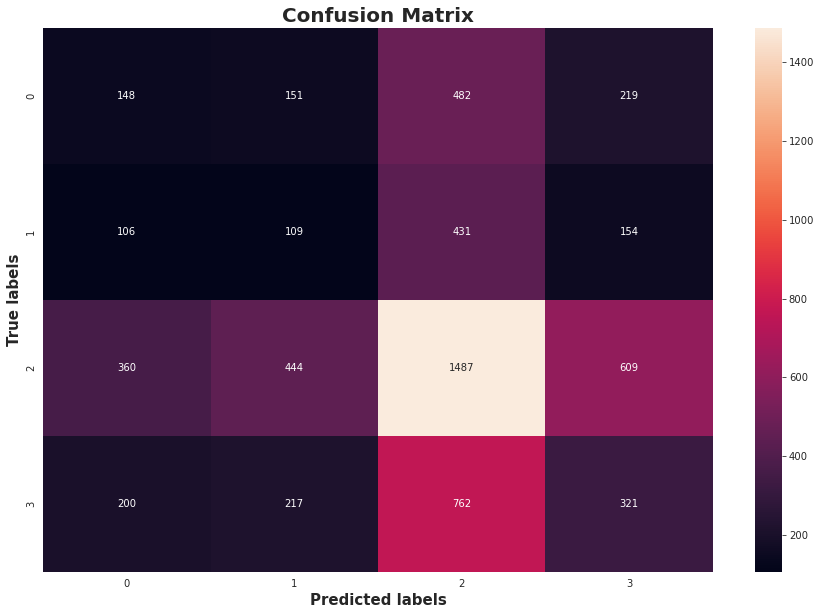

In [ ]:
# Getting classification report and confusion matrix on test dataset

y_pred = model9.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

In [ ]:
model9.save('model9_final.h5')

## Examining results from the "best" model saved based on validation loss

In [ ]:
model9_best = tf.keras.models.load_model('/kaggle/working/model9.h5')

validation_loss_best, validation_accu_best = model9_best.evaluate(validation_generator)
test_loss_best, test_accu_best = model9_best.evaluate(test_generator)
print("Best Validation accuracy = {:.2f}, Test accuracy = {:.2f}".format(validation_accu_best*100, test_accu_best*100))

1588/1588 [==============================] - 107s 67ms/step - loss: 1.0467 - accuracy: 0.6480

775/775 [==============================] - 51s 66ms/step - loss: 0.7852 - accuracy: 0.8121

Best Validation accuracy = 64.80, Test accuracy = 81.21


Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.06      0.05      0.05       700

        frown       0.11      0.22      0.15      1500

      neutral       0.58      0.46      0.51      7500

        smile       0.24      0.25      0.24      3000



     accuracy                           0.36     12700

    macro avg       0.25      0.25      0.24     12700

 weighted avg       0.41      0.36      0.38     12700



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

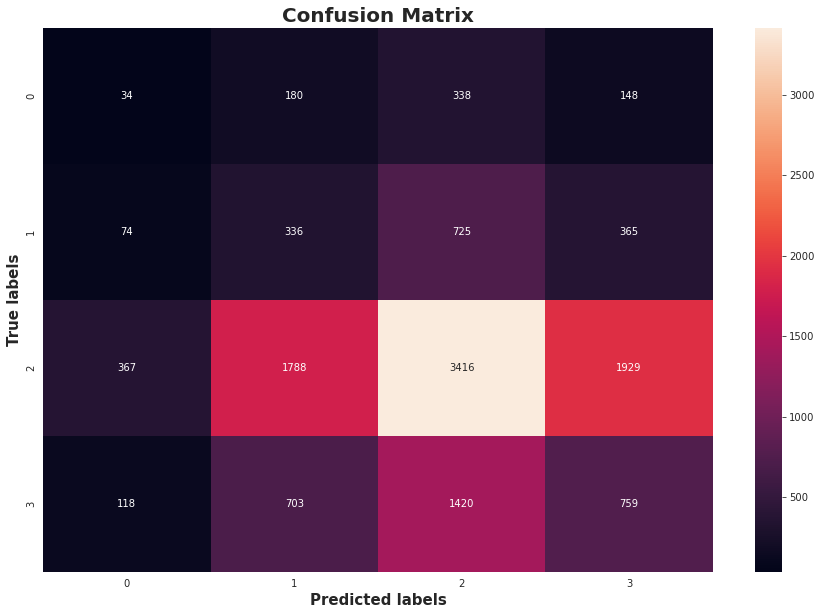

In [ ]:
# Getting classification report and confusion matrix on validation dataset with saved best model

y_pred = model9_best.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_validation = confusion_matrix(validation_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_validation, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

Classification Report: 

               precision    recall  f1-score   support



eyebrow_raise       0.15      0.09      0.12      1000

        frown       0.12      0.14      0.13       800

      neutral       0.46      0.58      0.51      2900

        smile       0.22      0.16      0.19      1500



     accuracy                           0.34      6200

    macro avg       0.24      0.24      0.24      6200

 weighted avg       0.31      0.34      0.32      6200



Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

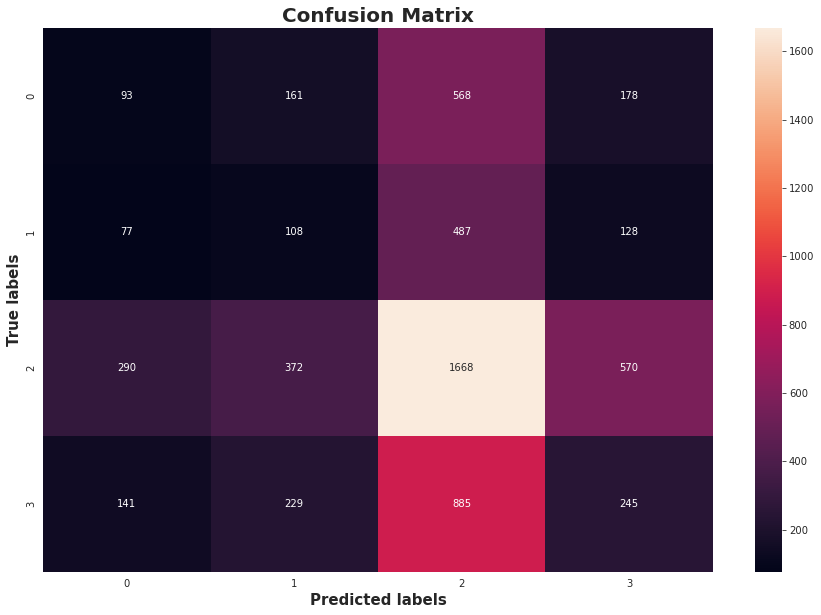

In [ ]:
# Getting classification report and confusion matrix on test dataset with saved best model

y_pred = model9_best.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

class_labels = test_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

print('Classification Report: ')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print('Confusion Matrix: ')
cm_test = confusion_matrix(test_generator.classes, y_pred)

fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')